In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
%matplotlib inline

In [41]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

# cafe_final.csv 파일 돌리면 됨! 

In [42]:
cafe = pd.read_csv("cafe_final.csv")
menu = pd.read_csv("fianl_menus_allmembers.csv")
comment = pd.read_csv("final_comments_allmembers.csv")
# alllat = pd.read_csv('all_lat.csv')

In [43]:
del cafe['Unnamed: 0']
# # del cafe['Unnamed: 0.1']
# # del cafe['Unnamed: 0.1.1']

In [44]:
del menu['Unnamed: 0']
del menu['Unnamed: 0.1']
del menu['Unnamed: 0.1.1']

In [45]:
del comment['Unnamed: 0']
del comment['Unnamed: 0.1']
del comment['Unnamed: 0.1.1']

In [46]:
cafe.head()

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,lat,lng
0,제주특별자치도 서귀포시 서귀동 294-24,294-24,제주특별자치도 서귀포시 서귀동,여정다방,11877497,NaN,0.0,서귀포시,서귀포시,서귀동,33.248312,126.561575
1,제주특별자치도 제주시 외도일동 475-8,475-8,제주특별자치도 제주시 외도일동,아장아장 베이비카페,1263620627,http://t1.daumcdn.net/place/83909D95B967478D80...,0.0,제주시,제주시,외도일동,33.489895,126.430688
2,제주특별자치도 서귀포시 대정읍 보성리 175-6,175-6,제주특별자치도 서귀포시 대정읍 보성리,소소희,368243275,http://t1.daumcdn.net/place/8395E365EA5B4F04BB...,0.0,서귀포시,대정읍,보성리,33.274976,126.278127
3,제주특별자치도 제주시 건입동 1325,1325,제주특별자치도 제주시 건입동,항구다방,1571310600,NaN,0.0,제주시,제주시,건입동,33.516313,126.528937
4,제주특별자치도 서귀포시 성산읍 삼달리 437-5,437-5,제주특별자치도 서귀포시 성산읍 삼달리,두모악무인찻집,13571332,http://t1.daumcdn.net/place/2535E720C72A4A5B9D...,0.0,서귀포시,성산읍,삼달리,33.371935,126.854377


In [24]:
cafe['address'].unique

<bound method Series.unique of 0           제주특별자치도 서귀포시 서귀동
1           제주특별자치도 제주시 외도일동
2       제주특별자치도 서귀포시 대정읍 보성리
3            제주특별자치도 제주시 건입동
4       제주특별자치도 서귀포시 성산읍 삼달리
                ...         
3400     제주특별자치도 제주시 애월읍 신엄리
3401     제주특별자치도 제주시 조천읍 신촌리
3402    제주특별자치도 제주시 애월읍 유수암리
3403    제주특별자치도 서귀포시 남원읍 위미리
3404     제주특별자치도 제주시 구좌읍 평대리
Name: address, Length: 3405, dtype: object>

In [158]:
# cafe.to_csv('cafe_final.csv')

In [163]:
# cafe1=cafe.merge(alllat, how='left',on='cafe_id')

In [164]:
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

In [166]:
drop_y(cafe1)

In [168]:
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)

In [169]:
rename_x(cafe1)

In [170]:
def rename_y(df):
    for col in df:
        if col.endswith('_y'):
            df.rename(columns={col:col.rstrip('_y')}, inplace=True)

In [171]:
rename_y(cafe1)

In [175]:
# del cafe1['address1']
# del cafe1['Unnamed: 0']

In [176]:
cafe1.head()

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,lat,lng
0,제주특별자치도 서귀포시 서귀동 294-24,294-24,제주특별자치도 서귀포시 서귀동,여정다방,11877497,NaN,0.0,서귀포시,서귀포시,서귀동,33.248312,126.561575
1,제주특별자치도 제주시 외도일동 475-8,475-8,제주특별자치도 제주시 외도일동,아장아장 베이비카페,1263620627,http://t1.daumcdn.net/place/83909D95B967478D80...,0.0,제주시,제주시,외도일동,33.489895,126.430688
2,제주특별자치도 서귀포시 대정읍 보성리 175-6,175-6,제주특별자치도 서귀포시 대정읍 보성리,소소희,368243275,http://t1.daumcdn.net/place/8395E365EA5B4F04BB...,0.0,서귀포시,대정읍,보성리,33.274976,126.278127
3,제주특별자치도 제주시 건입동 1325,1325,제주특별자치도 제주시 건입동,항구다방,1571310600,NaN,0.0,제주시,제주시,건입동,33.516313,126.528937
4,제주특별자치도 서귀포시 성산읍 삼달리 437-5,437-5,제주특별자치도 서귀포시 성산읍 삼달리,두모악무인찻집,13571332,http://t1.daumcdn.net/place/2535E720C72A4A5B9D...,0.0,서귀포시,성산읍,삼달리,33.371935,126.854377


In [178]:
# cafe1.to_csv('cafe_final.csv')

In [156]:
# # del cafe['address1']
# del cafe['dong']

In [153]:
# cafe['ri'] = cafe['address1'].apply(lambda x: x[2] if len(x) == 3 else x[3])

In [129]:
# cafe['address1'][0]

"['제주특별자치도', '서귀포시', '서귀동']"

In [15]:
# cafe['si'] = cafe['address'].apply(lambda x: x.split()[1])

In [16]:
# cafe.groupby('si').count()

In [17]:
# cafe['address'].apply(lambda x: x.split()[2])

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '시 별 카페 수')

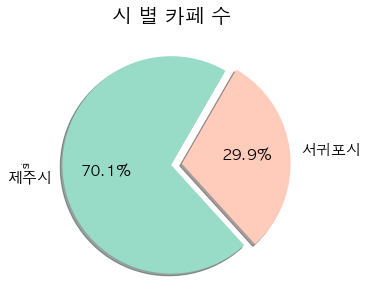

In [19]:
# labels=['제주시', '서귀포시']
cafe['si'].value_counts().plot.pie(colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('시 별 카페 수', fontsize=20)
# pylab.ylabel('')

In [20]:
# cafe['si'] = cafe['address'].apply(lambda x: x.split()[1])

In [21]:
# cafe['address'].head()

In [152]:
# cafe['address1'] = cafe['address'].apply(lambda x: x.split())

In [23]:
# cafe['town'] = cafe['address1'].apply(lambda x: x[1] if len(x) == 3 else x[2])

In [24]:
cafe.groupby('town').count()

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,ri,dong,address1
town,,,,,,,,,,,
구좌읍,238,238,238,238,238,145,238,238,238,238,238
남원읍,84,84,84,84,84,42,84,84,84,84,84
대정읍,103,103,103,103,103,47,103,103,103,103,103
서귀포시,487,487,487,487,487,212,487,487,487,487,487
성산읍,136,136,136,136,136,72,136,136,136,136,136
안덕면,130,130,130,130,130,80,130,130,130,130,130
애월읍,231,231,232,232,232,144,232,232,232,232,232
우도면,61,61,61,61,61,31,61,61,61,61,61
제주시,1433,1433,1434,1434,1434,646,1434,1434,1434,1434,1434


Text(0.5, 1.0, '지역별 카페 수')

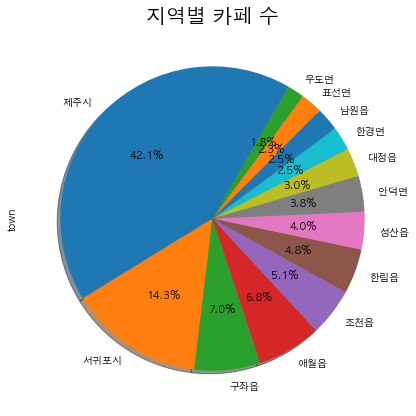

In [25]:
# labels=['학교', '운동장', '공원', '기타', '체육관']
cafe['town'].value_counts().plot.pie(
#     labels = labels
#                     ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB']
                    startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
#                     ,explode = (0.1,0,0,0,0) 
                    ,figsize=(7, 7)
                    ,fontsize = 10)
plt.title('지역별 카페 수', fontsize=20)
# pylab.ylabel('')

In [114]:

# cafe['ri'] = cafe['address1'].apply(lambda x: x[1] if len(x) == 3 else x[3])
# cafe['ri'] = cafe['address1'].apply(lambda x: x[1] if len(x) == 2 else x[2])

In [ ]:

# cafe['ri'] = cafe['address1'].apply(lambda x: x[1] if len(x) == 3 )
# cafe['ri'] = cafe['address1'].apply(lambda x: x[1] if len(x) == 2 )

In [8]:
caferi = cafe.copy()

In [28]:
caferi = pd.DataFrame(caferi['ri'])
caferi.head()

,ri
0,서귀포시
1,제주시
2,보성리
3,제주시
4,삼달리


In [29]:
caferi = caferi[caferi != '제주시'] + caferi[caferi != '서귀포시']

In [30]:
caferi.dropna(inplace=True)

In [31]:
# caferi.groupby('ri')['ri'].count()

In [32]:
# # caferi['count']=
# caferi=pd.DataFrame(caferi.groupby('ri')['ri'].count())

In [33]:
caferi1=caferi['ri'].value_counts()[:15]
# .to_frame()
# caferi['count']
caferi1.to_frame()
caferi1=caferi1.reset_index()

In [34]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()

In [35]:
sw=caferi['ri'].value_counts()[:15]

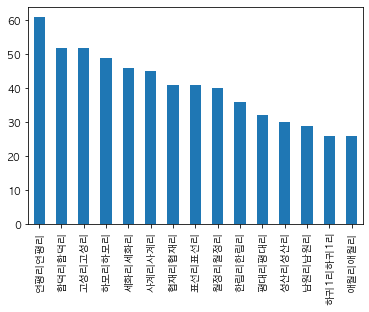

In [36]:
sw.plot(kind="bar")

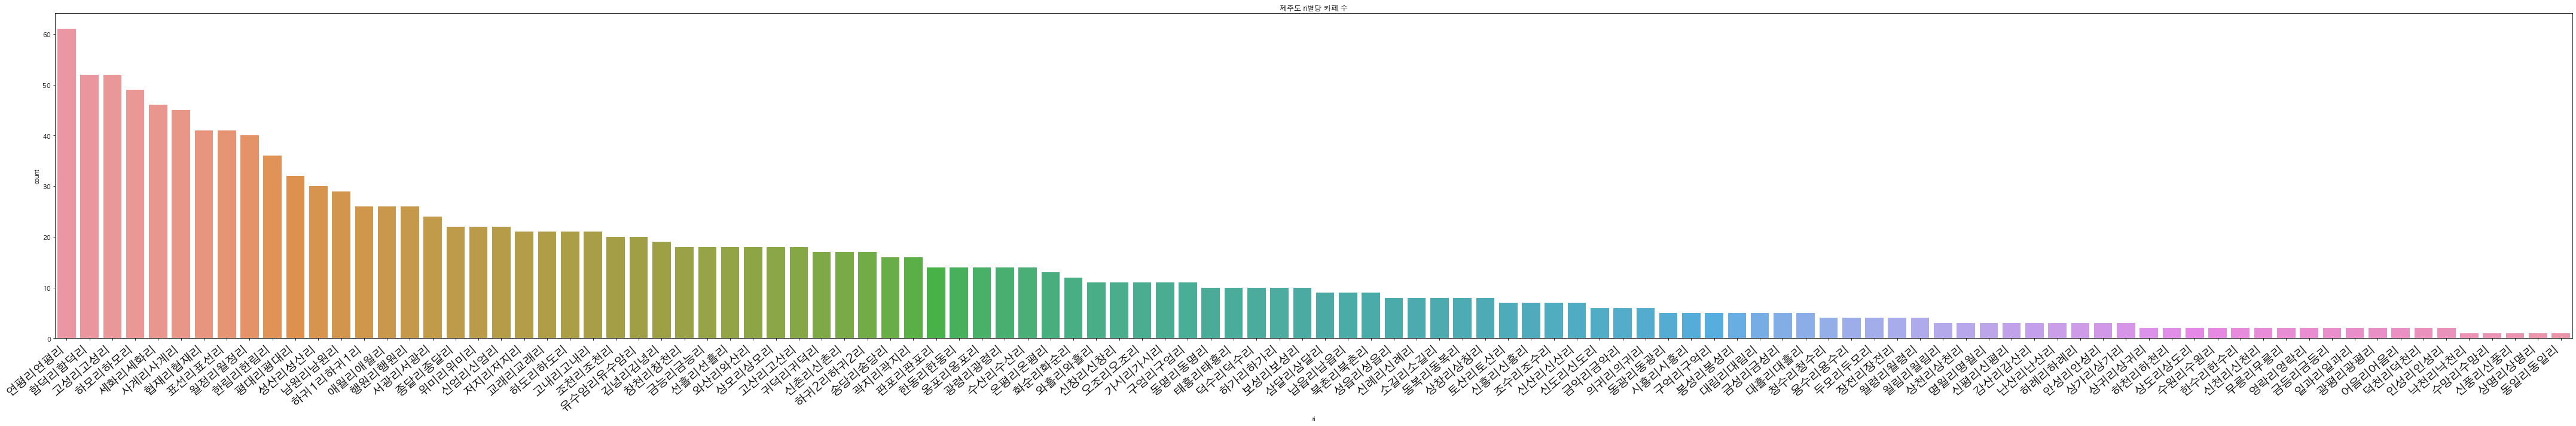

In [39]:
# sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
# plt.show()

plt.figure(figsize=(60,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(data=caferi, x="ri", order=caferi['ri'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=20)
                  #,order = caferi.value_counts().index )
# caferi['ri'].value_counts().plot(kind="bar" , cmap=plt.get_cmap(m))
plt.title("제주도 ri별당 카페 수")
plt.tight_layout()
plt.show()

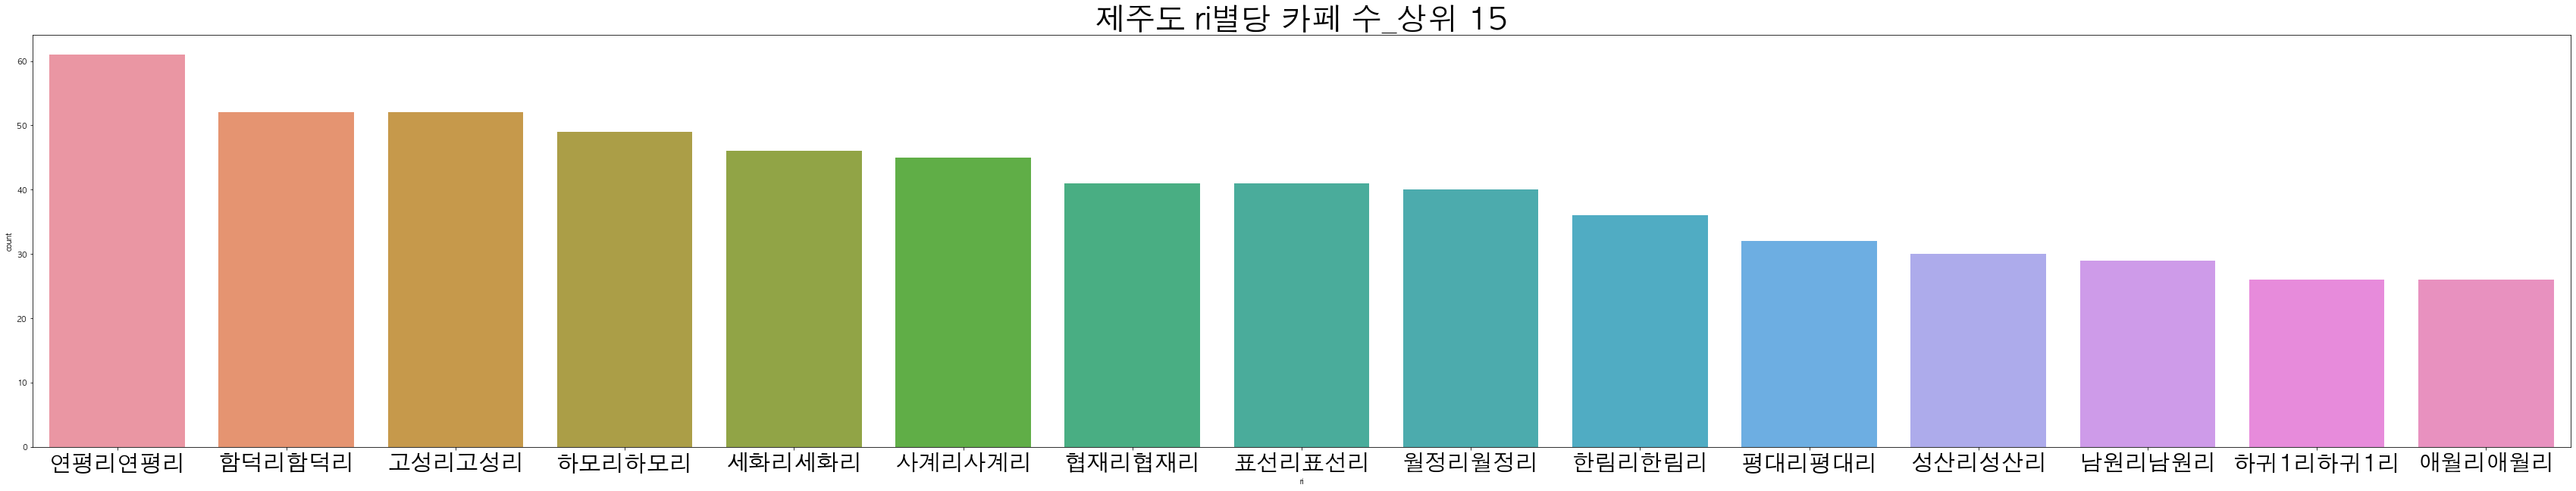

In [42]:
# sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
# plt.show()

plt.figure(figsize=(60,10),) # this creates a figure 8 inch wide, 4 inch high
ax=sns.countplot(data=caferi, x="ri"
              ,order=caferi['ri'].value_counts()[:15].index)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=30)
# ax.set_xticklabels(ax.get_xticklabels(), ha="right", fontsize = 10)
                  #,order = caferi.value_counts().index )
# caferi['ri'].value_counts().plot(kind="bar" , cmap=plt.get_cmap(m))
plt.title("제주도 ri별당 카페 수_상위 15", fontsize=40)
# plt.tight_layout()
plt.show()

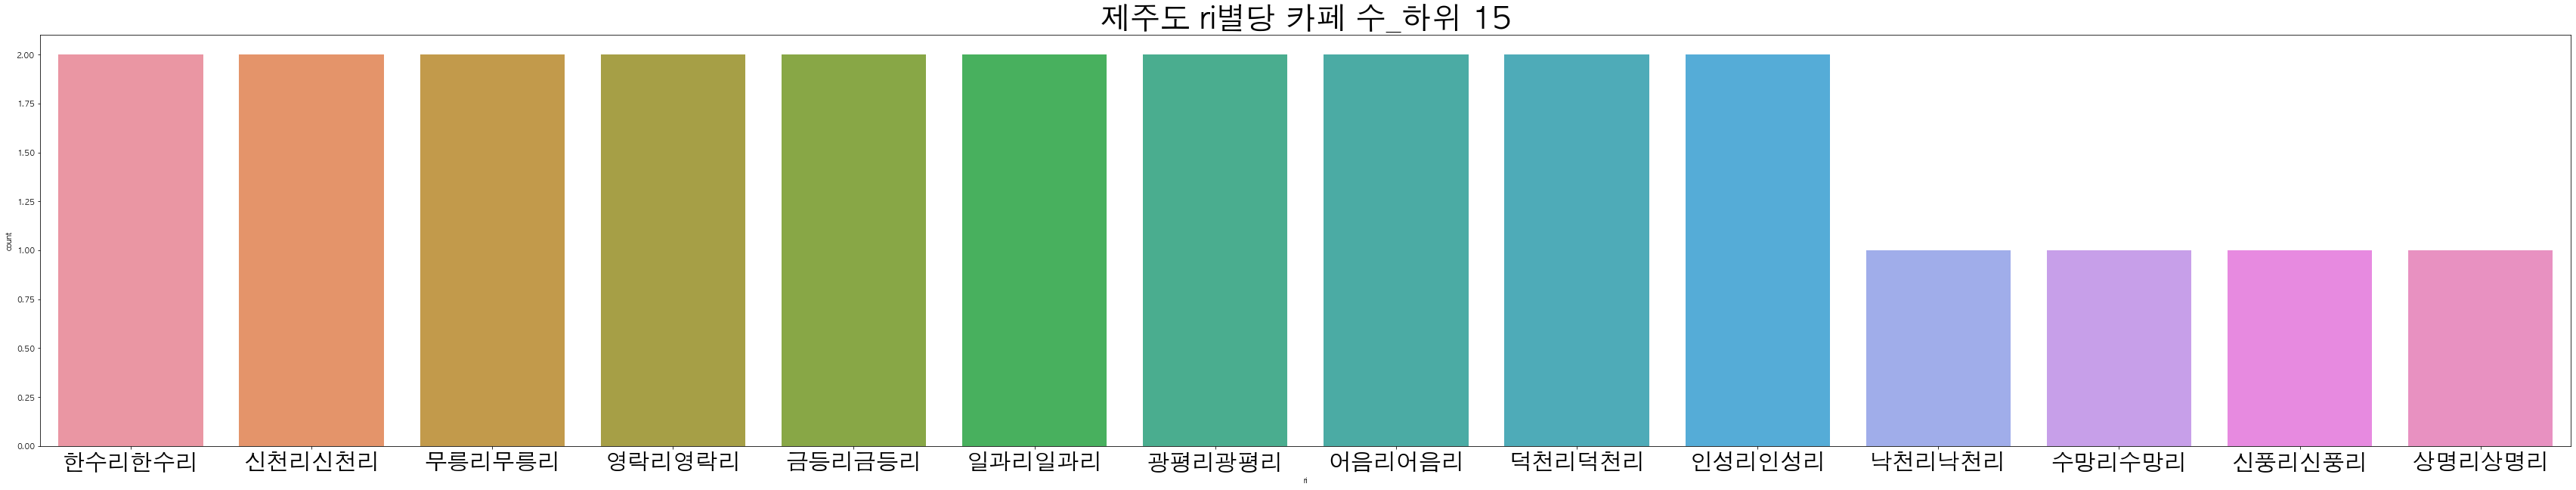

In [184]:

plt.figure(figsize=(60,10),) # this creates a figure 8 inch wide, 4 inch high
ax=sns.countplot(data=caferi, x="ri"
              ,order=caferi['ri'].value_counts()[-15:-1].index)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=30)
# ax.set_xticklabels(ax.get_xticklabels(), ha="right", fontsize = 10)
                  #,order = caferi.value_counts().index )
# caferi['ri'].value_counts().plot(kind="bar" , cmap=plt.get_cmap(m))
plt.title("제주도 ri별당 카페 수_하위 15", fontsize=40)
# plt.tight_layout()
plt.show()

Text(0.5, 1.0, '제주도 리별 카페 수')

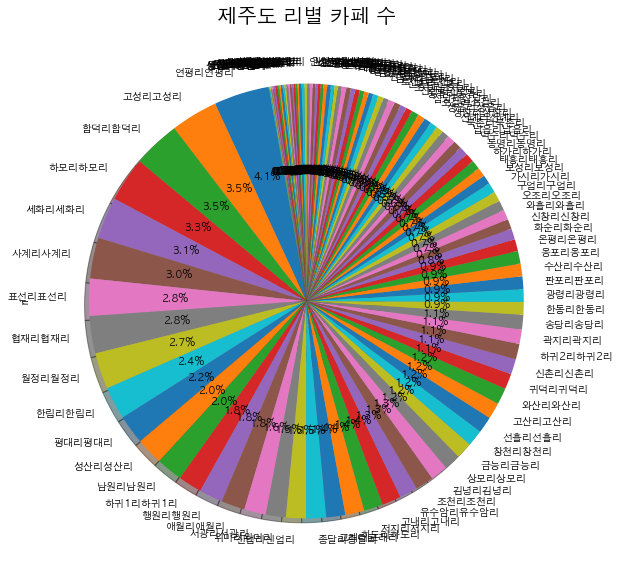

In [596]:
caferi['ri'].value_counts().plot.pie(
#     labels = labels
#                     ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB']
                    startangle = 100
                    ,shadow = True
                    ,autopct = '%2.1f%%'
#                     ,explode = (0.1,0,0,0,0) 
                    ,figsize=(10, 10)
                    ,fontsize = 10)
plt.title('제주도 리별 카페 수', fontsize=20)
# pylab.ylabel('')

# 제주시 동별 정보 살펴보기 

In [38]:
jejudong =  cafe.copy()

In [39]:
jejudong = pd.DataFrame(jejudong['address'])
jejudong = jejudong[jejudong['address'].str.contains('동')]
jejudong.head()

,address
0,제주특별자치도 서귀포시 서귀동
1,제주특별자치도 제주시 외도일동
3,제주특별자치도 제주시 건입동
9,제주특별자치도 제주시 이도2동
10,제주특별자치도 제주시 삼양이동


In [26]:
jejudong = pd.DataFrame(jejudong['ri'])
jejudong = jejudong[jejudong['ri'].str.contains('동|제주시')]
jejudong.head()

,ri
0,서귀동
1,외도일동
3,건입동
9,이도2동
10,삼양이동


In [27]:
jejudong['ri'].count()

1958

In [18]:
jejudong.count()

ri    1958
dtype: int64

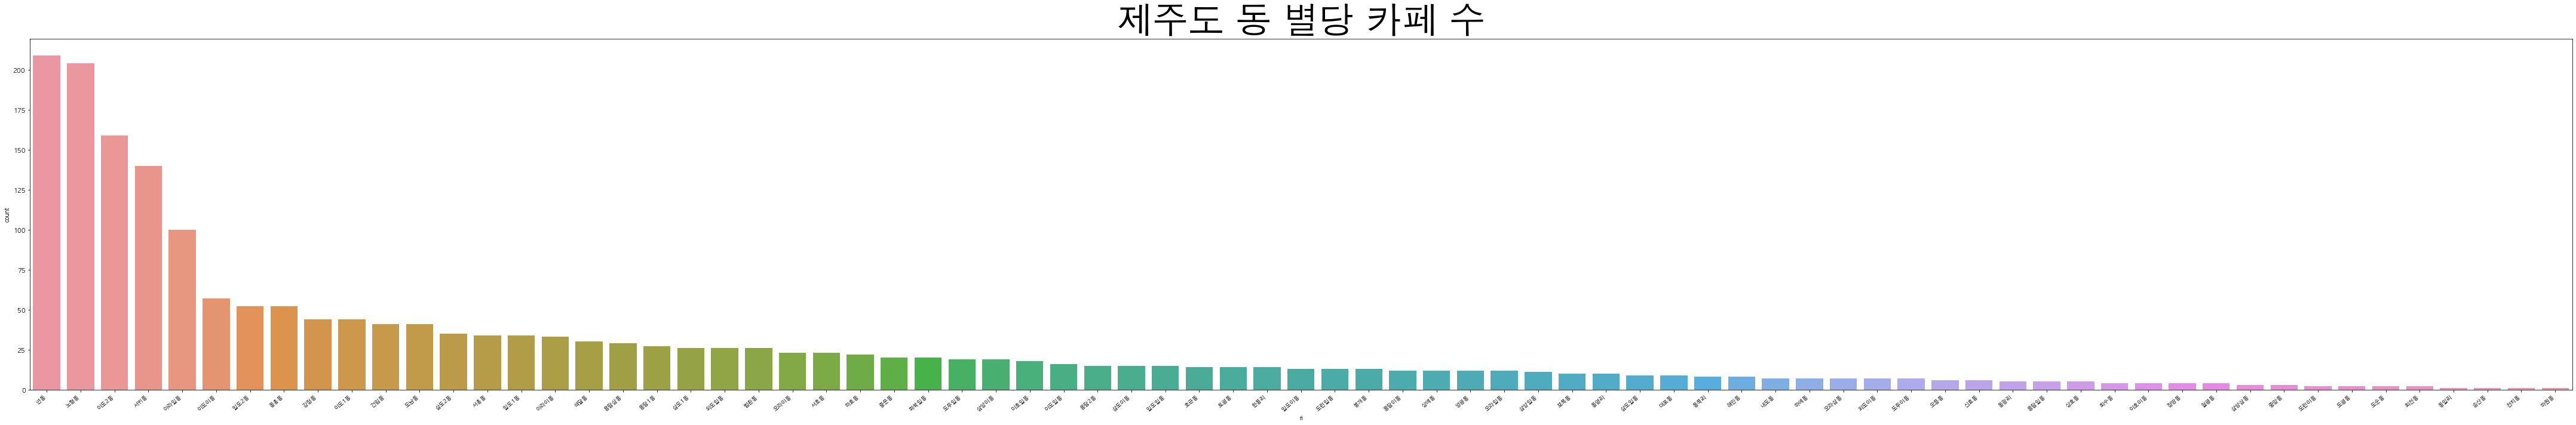

In [19]:
# sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
# plt.show()

plt.figure(figsize=(60,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(data=jejudong, x="ri", order=jejudong['ri'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=9)
                  #,order = caferi.value_counts().index )
# caferi['ri'].value_counts().plot(kind="bar" , cmap=plt.get_cmap(m))
plt.title("제주도 동 별당 카페 수", fontsize=60)
plt.tight_layout()
plt.show()

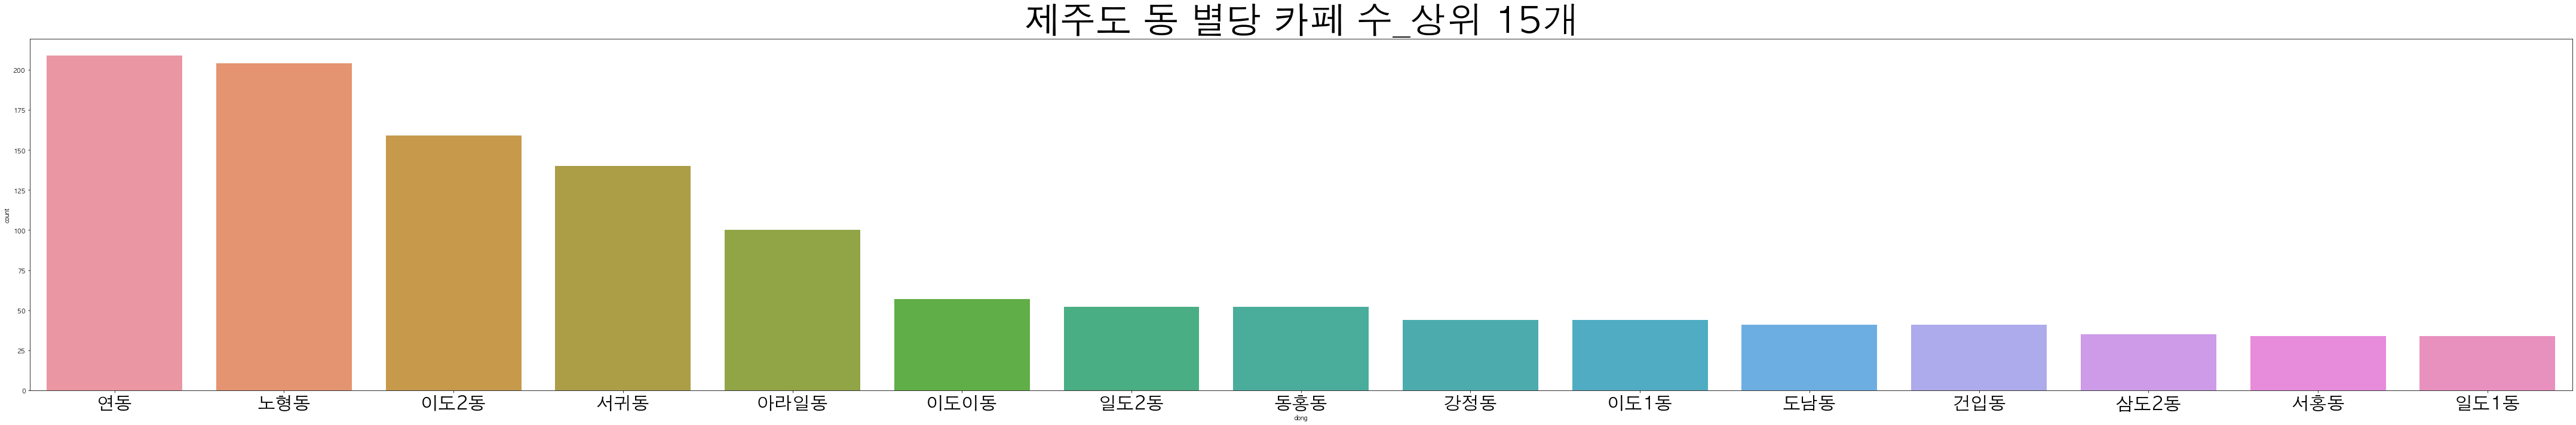

In [49]:
# sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
# plt.show()

plt.figure(figsize=(60,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(data=jejudong, x="dong", order=jejudong['dong'].value_counts()[:15].index)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=30)
                  #,order = caferi.value_counts().index )
# caferi['ri'].value_counts().plot(kind="bar" , cmap=plt.get_cmap(m))
plt.title("제주도 동 별당 카페 수_상위 15개", fontsize=60)
plt.tight_layout()
plt.show()

In [483]:
# cafe['ri'] = cafe['address1'].apply(lambda x: x[1] if len(x) == 2 else x[2])

In [485]:
# cafe['final_address']=cafe['address'] +' '+ cafe['addrbunho']

In [486]:
# cafe = cafe[['final_address','addrbunho', 'address', 'cafe', 'cafe_id', 'image_url', 'franchise',
#        'si',  'town', 'ri', 'dong','address1']]

# 모은 정보 최종판 cafe 저장!!

In [ ]:
# cafe.to_csv('cafe_final.csv')

# 제주시만 따로 만들기

In [47]:
cafe_jeju = cafe[cafe['town'].str.contains('제주시')]
cafe_jeju.shape

(1434, 12)

In [48]:
cafe_jeju.head()

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,lat,lng
1,제주특별자치도 제주시 외도일동 475-8,475-8,제주특별자치도 제주시 외도일동,아장아장 베이비카페,1263620627,http://t1.daumcdn.net/place/83909D95B967478D80...,0.0,제주시,제주시,외도일동,33.489895,126.430688
3,제주특별자치도 제주시 건입동 1325,1325,제주특별자치도 제주시 건입동,항구다방,1571310600,NaN,0.0,제주시,제주시,건입동,33.516313,126.528937
9,제주특별자치도 제주시 이도2동 1766-1,1766-1,제주특별자치도 제주시 이도2동,슬로우,15521226,NaN,0.0,제주시,제주시,이도2동,33.498757,126.528735
10,제주특별자치도 제주시 삼양이동 2176-12,2176-12,제주특별자치도 제주시 삼양이동,방방파티 제주삼화점,969286213,NaN,0.0,제주시,제주시,삼양이동,33.519841,126.582294
14,제주특별자치도 제주시 아라일동 6126-13,6126-13,제주특별자치도 제주시 아라일동,카페일상,1411458986,http://t1.daumcdn.net/localfiy/8933047E9B6842C...,0.0,제주시,제주시,아라일동,33.473614,126.550366


In [85]:
# cafe_jeju['dong'] = cafe_jeju['address1'].apply(lambda x: x[1] if len(x) == 2 else x[2])

In [57]:
jeju_fr = cafe_jeju[cafe_jeju['franchise'] == 1]
jeju_fr.head()

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,lat,lng
86,제주특별자치도 제주시 오라이동 3100-3,3100-3,제주특별자치도 제주시 오라이동,파스쿠찌 신제주점,26974861,NaN,1.0,제주시,제주시,오라이동,33.481842,126.505242
129,제주특별자치도 제주시 도남동 694-3,694-3,제주특별자치도 제주시 도남동,파스쿠찌 제주종합청사점,26503933,http://t1.daumcdn.net/place/66547E013B5C46008C...,1.0,제주시,제주시,도남동,33.489577,126.523594
201,제주특별자치도 제주시 노형동 1054-6,1054-6,제주특별자치도 제주시 노형동,카페띠아모 제주북노형점,17624223,NaN,1.0,제주시,제주시,노형동,33.488792,126.476576
391,제주특별자치도 제주시 삼양이동 2332-5,2332-5,제주특별자치도 제주시 삼양이동,빽다방 제주삼화부영점,27398681,http://t1.daumcdn.net/place/939FC019273840C591...,1.0,제주시,제주시,삼양이동,33.517313,126.587692
447,제주특별자치도 제주시 영평동 2169-4,2169-4,제주특별자치도 제주시 영평동,투썸플레이스 제주엠제이벤처오름점,762783399,NaN,1.0,제주시,제주시,영평동,NaN,NaN


In [62]:
jeju_fr['cafe'].value_counts()

공차 제주삼화점         1
카페띠아모 제주삼화점      1
파스쿠찌 제주노형로타리점    1
파스쿠찌 제주제원점       1
파스쿠찌 신제주점        1
                ..
카페베네 제주연동점       1
커피마마 제주연동점       1
카페띠아모 제주법원점      1
투썸플레이스 제주용두암점    1
스팟커피빈벤더스         1
Name: cafe, Length: 91, dtype: int64

In [63]:
jeju_fr['fr1'] = jeju_fr['cafe'].apply(lambda x: x.split())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
jeju_fr['fr'] = jeju_fr['fr1'].apply(lambda x: x[0] if len(x) == 1 else x[0])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
jeju_fr['fr'].value_counts()

파스쿠찌        14
투썸플레이스      12
공차           8
빽다방          8
이디야커피        8
스타벅스         7
엔제리너스        7
카페띠아모        6
탐앤탐스         5
카페베네         4
드롭탑          2
커피마마         1
달콤커피         1
마이마더카페       1
할리스커피        1
커피에반하다       1
제주커피집        1
커피베이         1
토프레소         1
주커피          1
스팟커피빈벤더스     1
Name: fr, dtype: int64

In [86]:
# cafe_jeju['final_address']=cafe_jeju['address'] +' '+ cafe_jeju['addrbunho']

In [86]:
cafe_jeju.columns

Index(['final_address', 'addrbunho', 'address', 'cafe', 'cafe_id', 'image_url',
       'franchise', 'si', 'town', 'ri', 'dong', 'address1'],
      dtype='object')

In [82]:
# cafe_jeju = cafe_jeju[['final_address','addrbunho', 'address', 'cafe', 'cafe_id', 'image_url', 'franchise',
#        'si',  'town', 'ri', 'dong','address1']]

In [87]:
cafe_jeju.head()

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,dong,address1
1,제주특별자치도 제주시 외도일동 475-8,475-8,제주특별자치도 제주시 외도일동,아장아장 베이비카페,1263620627,http://t1.daumcdn.net/place/83909D95B967478D80...,0.0,제주시,제주시,제주시,외도일동,"['제주특별자치도', '제주시', '외도일동']"
3,제주특별자치도 제주시 건입동 1325,1325,제주특별자치도 제주시 건입동,항구다방,1571310600,NaN,0.0,제주시,제주시,제주시,건입동,"['제주특별자치도', '제주시', '건입동']"
9,제주특별자치도 제주시 이도2동 1766-1,1766-1,제주특별자치도 제주시 이도2동,슬로우,15521226,NaN,0.0,제주시,제주시,제주시,이도2동,"['제주특별자치도', '제주시', '이도2동']"
10,제주특별자치도 제주시 삼양이동 2176-12,2176-12,제주특별자치도 제주시 삼양이동,방방파티 제주삼화점,969286213,NaN,0.0,제주시,제주시,제주시,삼양이동,"['제주특별자치도', '제주시', '삼양이동']"
14,제주특별자치도 제주시 아라일동 6126-13,6126-13,제주특별자치도 제주시 아라일동,카페일상,1411458986,http://t1.daumcdn.net/localfiy/8933047E9B6842C...,0.0,제주시,제주시,제주시,아라일동,"['제주특별자치도', '제주시', '아라일동']"


In [88]:
cafe_jeju['dong'].shape

(1434,)

In [89]:
cafe_jeju['dong'].nunique()

46

In [90]:
cafe_jeju['dong'].unique()

array(['외도일동', '건입동', '이도2동', '삼양이동', '아라일동', '아라이동', '삼도이동', '영평동', '연동',
       '노형동', '용담1동', '삼도1동', '이도이동', '이호일동', '오라이동', '일도이동', '오라삼동',
       '일도2동', '일도1동', '용담2동', '도남동', '회천동', '도두일동', '용담삼동', '이호이동',
       '이도1동', '내도동', '용담이동', '외도이동', '화북일동', '삼도2동', '이도일동', '삼양일동',
       '도련일동', '일도일동', '삼도일동', '월평동', '도두이동', '봉개동', '도평동', '오라일동', '해안동',
       '용담일동', '삼양삼동', '오등동', '도련이동'], dtype=object)

In [56]:
# # sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
# # plt.show()

# plt.figure(figsize=(60,10)) # this creates a figure 8 inch wide, 4 inch high
# sns.countplot(data=cafe_jeju, x="dong", order=cafe_jeju['dong'].value_counts()[:15].index)
# # ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=9)
#                   #,order = caferi.value_counts().index )
# # caferi['ri'].value_counts().plot(kind="bar" , cmap=plt.get_cmap(m))
# plt.title("제주 시 동 별당 카페 수_상위 15개", fontsize=60)
# plt.tight_layout()
# plt.show()

Text(0.5, 1.0, '제주시 동별 카페 수')

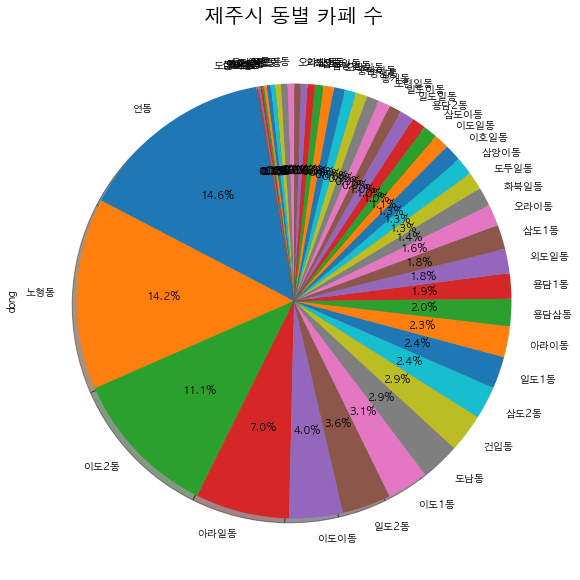

In [257]:
# labels=['학교', '운동장', '공원', '기타', '체육관']
cafe_jeju['dong'].value_counts().plot.pie(
#     labels = labels
#                     ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB']
                    startangle = 100
                    ,shadow = True
                    ,autopct = '%2.1f%%'
#                     ,explode = (0.1,0,0,0,0) 
                    ,figsize=(10, 10)
                    ,fontsize = 10)
plt.title('제주시 동별 카페 수', fontsize=20)
# pylab.ylabel('')

# 애월읍 카페 확인 

In [73]:
cafe_aw = cafe[cafe['town'].str.contains('애월읍')]
cafe_aw.shape

(232, 12)

In [74]:
cafe_aw.head()

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,lat,lng
32,제주특별자치도 제주시 애월읍 고내리 459,459,제주특별자치도 제주시 애월읍 고내리,망고홀릭 애월해안도로점,221879692,http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리,33.470427,126.341655
40,제주특별자치도 제주시 애월읍 광령리 1312,1312,제주특별자치도 제주시 애월읍 광령리,커피산책,1574963073,http://t1.daumcdn.net/place/99D0E3A66692477781...,0.0,제주시,애월읍,광령리,33.462011,126.440255
60,제주특별자치도 제주시 애월읍 고내리 1158,1158,제주특별자치도 제주시 애월읍 고내리,1158족욕카페,1787101427,http://t1.daumcdn.net/place/5678ABE30B67447184...,0.0,제주시,애월읍,고내리,33.467115,126.336517
63,제주특별자치도 제주시 애월읍 하귀2리 1436-5,1436-5,제주특별자치도 제주시 애월읍 하귀2리,쿠키키,437994854,http://t1.daumcdn.net/localfiy/searchregister_...,0.0,제주시,애월읍,하귀2리,33.482146,126.405545
66,제주특별자치도 제주시 애월읍 소길리 797-9,797-9,제주특별자치도 제주시 애월읍 소길리,난장이공,25081546,http://t1.daumcdn.net/place/AAFA87F418F44FD5B4...,0.0,제주시,애월읍,소길리,33.433976,126.379808


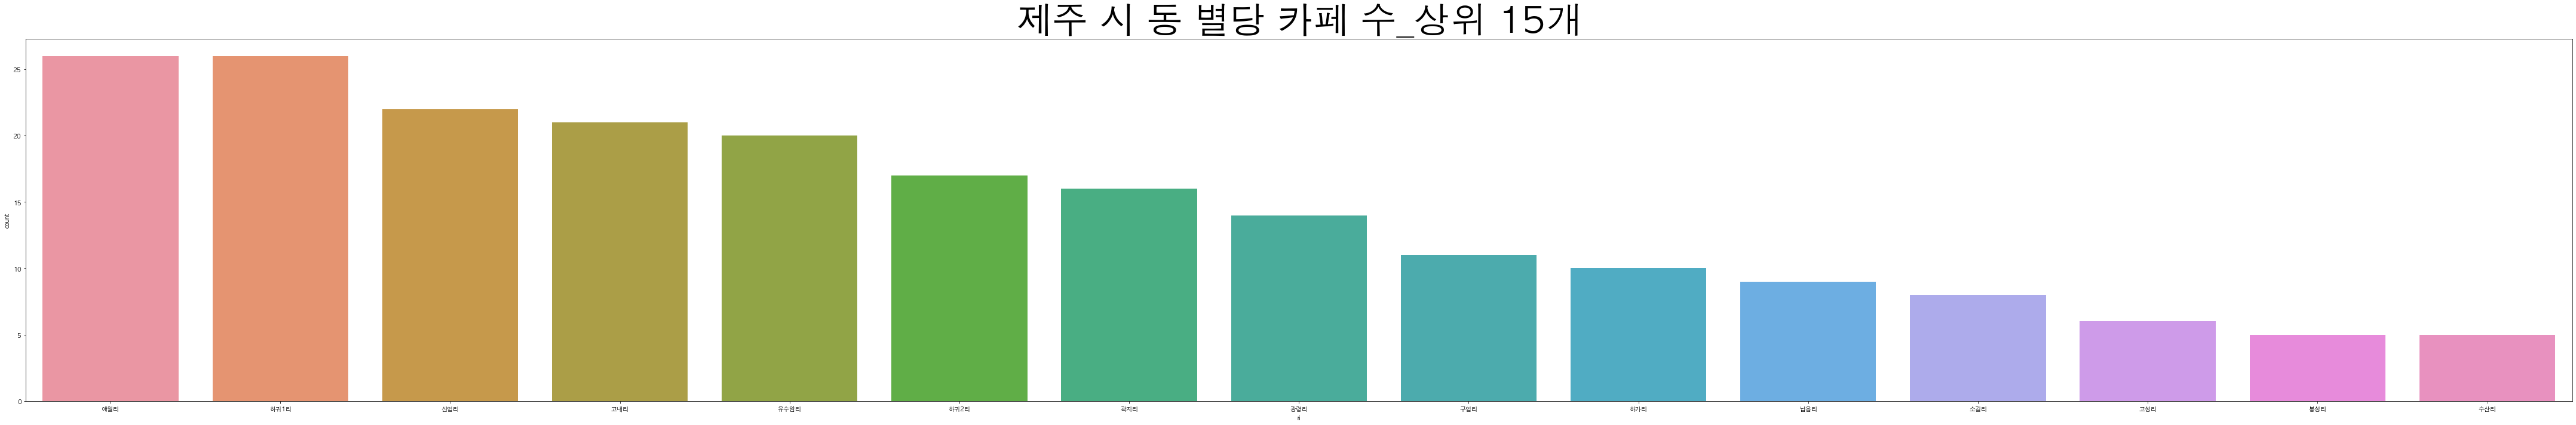

In [57]:
# sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
# plt.show()

plt.figure(figsize=(60,10)) # this creates a figure 8 inch wide, 4 inch high
aw=sns.countplot(data=cafe_aw, x="ri", order=cafe_aw['ri'].value_counts()[:15].index)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=30)
                  #,order = caferi.value_counts().index )
# caferi['ri'].value_counts().plot(kind="bar" , cmap=plt.get_cmap(m))
plt.title("제주 시 동 별당 카페 수_상위 15개", fontsize=60)
plt.tight_layout()
plt.show()

# 애월읍 프차 확인

In [76]:
aw_fr = cafe_aw[cafe_aw['franchise'] == 1]
aw_fr.head()

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,lat,lng
626,제주특별자치도 제주시 애월읍 유수암리 1014,1014,제주특별자치도 제주시 애월읍 유수암리,파스쿠찌 제주유수암점,614271019,http://t1.daumcdn.net/place/7D50C3F824094831AF...,1.0,제주시,애월읍,유수암리,33.423656,126.407991
946,제주특별자치도 제주시 애월읍 고내리 463,463,제주특별자치도 제주시 애월읍 고내리,엔제리너스 제주애월D/I점,26810675,NaN,1.0,제주시,애월읍,고내리,33.469622,126.340775
1108,제주특별자치도 제주시 애월읍 하귀1리 1603-2,1603-2,제주특별자치도 제주시 애월읍 하귀1리,달콤커피 볼륨1603 제주하귀점,1461897927,http://t1.daumcdn.net/localfiy/912B84A3B22A462...,1.0,제주시,애월읍,하귀1리,33.484796,126.405983
1691,제주특별자치도 제주시 애월읍 고내리 84,84,제주특별자치도 제주시 애월읍 고내리,투썸플레이스 제주애월다인호텔점,1298489888,http://t1.daumcdn.net/place/91D99A8BF1494E8B93...,1.0,제주시,애월읍,고내리,33.472507,126.350336
1955,제주특별자치도 제주시 애월읍 애월리 2489,2489,제주특별자치도 제주시 애월읍 애월리,투썸플레이스 제주애월한담점,939740355,http://t1.daumcdn.net/place/55CAB9EBC9C7484793...,1.0,제주시,애월읍,애월리,33.462114,126.310958


In [78]:
aw_fr['fr1'] = aw_fr['cafe'].apply(lambda x: x.split())
aw_fr['fr1'].head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


626            [파스쿠찌, 제주유수암점]
946         [엔제리너스, 제주애월D/I점]
1108    [달콤커피, 볼륨1603, 제주하귀점]
1691      [투썸플레이스, 제주애월다인호텔점]
1955        [투썸플레이스, 제주애월한담점]
Name: fr1, dtype: object

In [80]:
aw_fr['fr'] = aw_fr['fr1'].apply(lambda x: x[0] if len(x) == 1 else x[0])
aw_fr['fr'].head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


626       파스쿠찌
946      엔제리너스
1108      달콤커피
1691    투썸플레이스
1955    투썸플레이스
Name: fr, dtype: object

In [90]:
aw_fr['fr'].shape

(10,)

In [88]:
aw_fr[aw_fr['cafe'].str.contains('대학교')]

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,lat,lng,fr1,fr
2973,제주특별자치도 제주시 애월읍 광령리 2535,2535,제주특별자치도 제주시 애월읍 광령리,제주관광대학교 그라찌에,27190454,NaN,1.0,제주시,애월읍,광령리,33.448576,126.434443,"[제주관광대학교, 그라찌에]",제주관광대학교


In [52]:
# cafe_aw['final_address']=cafe_aw['address'] +' '+ cafe_aw['addrbunho']

In [268]:
# cafe_aw = cafe_aw[['final_address','addrbunho', 'address', 'cafe', 'cafe_id', 'image_url', 'franchise',
#        'si',  'town', 'ri','address1']]

In [32]:
# 프랜차이즈 빼기 _ 스타벅스

In [33]:
# cafe_jeju.loc[cafe_jeju['cafe'].str.contains('스타벅스'), 'cafe'].unique()

In [34]:
# cafe_스타벅스 =cafe[cafe['cafe'].str.contains('스타벅스')]
# cafe_할리스 = cafe[cafe['cafe'].str.contains('할리스')]
# cafe_탐앤탐스 = cafe[cafe['cafe'].str.contains('탐앤탐스')]
# cafe_공차 = cafe[cafe['cafe'].str.contains('공차')]
# cafe_파스쿠찌 = cafe[cafe['cafe'].str.contains('파스쿠찌')]
# cafe_투썸 = cafe[cafe['cafe'].str.contains('투썸')]
# cafe_이디야 = cafe[cafe['cafe'].str.contains('이디야')]
# cafe_달콤커피 = cafe[cafe['cafe'].str.contains('달콤커피')]
# cafe_커피베이 = cafe[cafe['cafe'].str.contains('커피베이')]
# cafe_커피빈 = cafe[cafe['cafe'].str.contains('커피빈')]
# cafe_빽다방 = cafe[cafe['cafe'].str.contains('빽다방')]
# cafe_엔제리너스 = cafe[cafe['cafe'].str.contains('엔제리너스')]
# cafe_띠아모 = cafe[cafe['cafe'].str.contains('카페띠아모')]
# cafe_그라찌에 = cafe[cafe['cafe'].str.contains('그라찌에')]
# cafe_전광수커피 = cafe[cafe['cafe'].str.contains('전광수커피')]
# cafe_카페보니또 = cafe[cafe['cafe'].str.contains('카페보니또')]
# cafe_토프레소 = cafe[cafe['cafe'].str.contains('토프레소')]
# cafe_주커피 = cafe[cafe['cafe'].str.contains('주커피')]
# cafe_메머드커피 = cafe[cafe['cafe'].str.contains('메머드커피')]
# cafe_커피에반하다 = cafe[cafe['cafe'].str.contains('커피에반하다')]
# cafe_더카페 = cafe[cafe['cafe'].str.contains('더카페')]
# cafe_더착한커피 = cafe[cafe['cafe'].str.contains('더착한커피')]
# cafe_커피마마 = cafe[cafe['cafe'].str.contains('커피마마')]
# cafe_드롭탑 = cafe[cafe['cafe'].str.contains('드롭탑')]
# cafe_커피스미스 = cafe[cafe['cafe'].str.contains('커피스미스')]
# cafe_카페베네 = cafe[cafe['cafe'].str.contains('카페베네')]

In [35]:
# cafe_fr= pd.concat([cafe_스타벅스,cafe_할리스 ,cafe_탐앤탐스,cafe_공차,cafe_파스쿠찌 ,cafe_투썸,cafe_이디야,
#                             cafe_달콤커피, cafe_커피베이, cafe_커피빈,cafe_빽다방, cafe_엔제리너스,
#                             cafe_띠아모,cafe_그라찌에, cafe_전광수커피,cafe_카페보니또,cafe_토프레소,cafe_주커피,
#                             cafe_메머드커피,cafe_커피에반하다,cafe_더카페,cafe_더착한커피,cafe_커피마마 ,
#                             cafe_드롭탑,cafe_커피스미스 ,cafe_카페베네])

In [36]:
# cafe_fr['franchise'] = 1
# cafe_fr.head()

In [37]:
cafe.columns

Index(['addrbunho', 'address', 'cafe', 'cafe_id', 'image_url', 'franchise',
       'si', 'town', 'ri'],
      dtype='object')

In [38]:
cafe_jeju.head()

,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,dong
1,475-8,"[제주특별자치도, 제주시, 외도일동]",아장아장 베이비카페,1263620627,http://t1.daumcdn.net/place/83909D95B967478D80...,0.0,제주시,제주시,제주시,외도일동
3,1325,"[제주특별자치도, 제주시, 건입동]",항구다방,1571310600,NaN,0.0,제주시,제주시,제주시,건입동
9,1766-1,"[제주특별자치도, 제주시, 이도2동]",슬로우,15521226,NaN,0.0,제주시,제주시,제주시,이도2동
10,2176-12,"[제주특별자치도, 제주시, 삼양이동]",방방파티 제주삼화점,969286213,NaN,0.0,제주시,제주시,제주시,삼양이동
14,6126-13,"[제주특별자치도, 제주시, 아라일동]",카페일상,1411458986,http://t1.daumcdn.net/localfiy/8933047E9B6842C...,0.0,제주시,제주시,제주시,아라일동


In [39]:
# cafe = pd.read_csv('final_cafe_franchise_v2.csv')

# cafe와 menu merge한 후, 카페 아메리카노 평균 가격 구하기

# 메뉴판 정리된 csv 불러오기

In [58]:
menu_ = pd.read_csv("menus_allmembers_category.csv")

In [59]:
menu_.head()

,cafe,cafe_id,name,price,category
0,펭귄부인,1221695,따뜻한 홍차,"5,000",논커피
1,펭귄부인,1221695,냉침홍차,"5,000",논커피
2,펭귄부인,1221695,바닐라 밀크티(ice),"6,000",논커피
3,펭귄부인,1221695,블루베리 에이드,"6,000",논커피
4,보롬왓카페,6325127,딸바,"7,000",논커피


In [61]:
cm_=menu_.merge(cafe, how='left', on=['cafe', 'cafe_id'])

In [71]:
cm_.head()

,cafe,cafe_id,name,price,category,final_address,addrbunho,address,image_url,franchise,si,town,ri,dong,address1
0,펭귄부인,1221695,따뜻한 홍차,"5,000",논커피,제주특별자치도 제주시 이도2동 2004-6,2004-6,제주특별자치도 제주시 이도2동,http://t1.daumcdn.net/place/DA1C26864C684B23AE...,0.0,제주시,제주시,제주시,이도2동,"['제주특별자치도', '제주시', '이도2동']"
1,펭귄부인,1221695,냉침홍차,"5,000",논커피,제주특별자치도 제주시 이도2동 2004-6,2004-6,제주특별자치도 제주시 이도2동,http://t1.daumcdn.net/place/DA1C26864C684B23AE...,0.0,제주시,제주시,제주시,이도2동,"['제주특별자치도', '제주시', '이도2동']"
2,펭귄부인,1221695,바닐라 밀크티(ice),"6,000",논커피,제주특별자치도 제주시 이도2동 2004-6,2004-6,제주특별자치도 제주시 이도2동,http://t1.daumcdn.net/place/DA1C26864C684B23AE...,0.0,제주시,제주시,제주시,이도2동,"['제주특별자치도', '제주시', '이도2동']"
3,펭귄부인,1221695,블루베리 에이드,"6,000",논커피,제주특별자치도 제주시 이도2동 2004-6,2004-6,제주특별자치도 제주시 이도2동,http://t1.daumcdn.net/place/DA1C26864C684B23AE...,0.0,제주시,제주시,제주시,이도2동,"['제주특별자치도', '제주시', '이도2동']"
4,보롬왓카페,6325127,딸바,"7,000",논커피,제주특별자치도 서귀포시 표선면 성읍리 3229-4,3229-4,제주특별자치도 서귀포시 표선면 성읍리,http://t1.daumcdn.net/place/E6C769CCEA524C52A5...,0.0,서귀포시,표선면,성읍리,표선면,"['제주특별자치도', '서귀포시', '표선면', '성읍리']"


In [65]:
cm_['name'].value_counts()

아메리카노           428
카페라떼            305
카푸치노            124
에스프레소            99
카페모카             71
               ... 
당유자(수제)           1
단호박죽 세트           1
민트초코 라떼           1
초콜릿 라떼 (ICE)      1
스페셜 드립            1
Name: name, Length: 4873, dtype: int64

In [78]:
cm_['price'].value_counts()

5,000      1285
6,000       968
4,500       940
4,000       826
5,500       817
           ... 
33,500        1
110,000       1
22,500        1
100,000       1
11,800        1
Name: price, Length: 142, dtype: int64

In [110]:
amri = cm_[cm_['name'].str.contains('아메리|meri')] 

In [111]:
amriprice = amri.merge(cm_ , how='left', on='price')

In [113]:
amriprice.head()

,cafe_x,cafe_id_x,name_x,price,category_x,final_address_x,addrbunho_x,address_x,image_url_x,franchise_x,...,final_address_y,addrbunho_y,address_y,image_url_y,franchise_y,si_y,town_y,ri_y,dong_y,address1_y
0,메르블루,7860278,아메리카노,NaN,커피,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,...,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,제주시,제주시,제주시,연동,"['제주특별자치도', '제주시', '연동']"
1,메르블루,7860278,아메리카노,NaN,커피,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,...,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,제주시,제주시,제주시,연동,"['제주특별자치도', '제주시', '연동']"
2,메르블루,7860278,아메리카노,NaN,커피,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,...,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,제주시,제주시,제주시,연동,"['제주특별자치도', '제주시', '연동']"
3,메르블루,7860278,아메리카노,NaN,커피,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,...,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,제주시,제주시,제주시,연동,"['제주특별자치도', '제주시', '연동']"
4,메르블루,7860278,아메리카노,NaN,커피,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,...,제주특별자치도 제주시 연동 680-26,680-26,제주특별자치도 제주시 연동,NaN,0.0,제주시,제주시,제주시,연동,"['제주특별자치도', '제주시', '연동']"


In [112]:
amriprice.groupby(['town'])['price'].max().reset_index().sort_values(by='price',ascending=False)

KeyError: 'town'

In [104]:
cm_amri_price=cm_amri['price'].dropna()

In [105]:
cm_amri_price.head()

66     2,500
97     3,000
127    3,500
128    4,000
139    4,500
Name: price, dtype: object

In [106]:
cm_amri_price.max()

'8,000'

In [63]:
# cm=menu.merge(cafe, how='left', on=['cafe', 'cafe_id'])
# #merge(comment,how='left', on=['cafe', 'cafe_id'])

In [64]:
# cm.head()

In [42]:
cm['price'] = cm['price'].str.replace(',','')

In [43]:
cm['price'] = cm['price'].apply(pd.to_numeric)

In [44]:
cm_jeju = cm[cm['town']=='제주시']

In [45]:
cm_jeju['name'].value_counts()

아메리카노             155
카페라떼              136
카푸치노               53
에스프레소              44
카페모카               36
                 ... 
아메리카노A(고소한)         1
쿠키 앤 크림/카라멜프라페      1
참빙수(초코/망고)          1
갈릭버터브레드 (세트2)       1
키위주스                1
Name: name, Length: 2157, dtype: int64

In [46]:
cm_jeju[cm_jeju['name']=='보호자입장료(1인)']

,cafe,cafe_id,name,price,addrbunho,address,image_url,franchise,si,town,ri
16,방방파티 제주삼화점,969286213,보호자입장료(1인),2000.0,2176-12,"[제주특별자치도, 제주시, 삼양이동]",NaN,0.0,제주시,제주시,제주시


In [47]:
Jeju_ame = cm_jeju[cm_jeju['name'].str.contains('아메리')]
Jeju_ame.head()

,cafe,cafe_id,name,price,addrbunho,address,image_url,franchise,si,town,ri
148,사닮과,1157034383,아메리카노 (HOT),3500.0,6102-1,"[제주특별자치도, 제주시, 아라일동]",http://t1.daumcdn.net/place/EE8574B21833428D90...,0.0,제주시,제주시,제주시
149,사닮과,1157034383,아메리카노 (ICE),4000.0,6102-1,"[제주특별자치도, 제주시, 아라일동]",http://t1.daumcdn.net/place/EE8574B21833428D90...,0.0,제주시,제주시,제주시
197,누벨바그,128900657,아메리카노 외,3000.0,437-7,"[제주특별자치도, 제주시, 이도이동]",http://t1.daumcdn.net/localfiy/searchregister_...,0.0,제주시,제주시,제주시
198,카페라능,900010274,아메리카노,4000.0,1927-1,"[제주특별자치도, 제주시, 이호일동]",http://t1.daumcdn.net/place/53417AB001D2489D8C...,0.0,제주시,제주시,제주시
218,브라운카페,9060022,아메리카노,4000.0,1411-3,"[제주특별자치도, 제주시, 연동]",http://t1.daumcdn.net/place/216C407AB911401BA7...,0.0,제주시,제주시,제주시


In [48]:
Jeju_ame = cm_jeju[cm_jeju['name'].str.contains('아메리|ricano')] 
len(Jeju_ame)

305

In [49]:
Jeju_ame.head(2)

,cafe,cafe_id,name,price,addrbunho,address,image_url,franchise,si,town,ri
148,사닮과,1157034383,아메리카노 (HOT),3500.0,6102-1,"[제주특별자치도, 제주시, 아라일동]",http://t1.daumcdn.net/place/EE8574B21833428D90...,0.0,제주시,제주시,제주시
149,사닮과,1157034383,아메리카노 (ICE),4000.0,6102-1,"[제주특별자치도, 제주시, 아라일동]",http://t1.daumcdn.net/place/EE8574B21833428D90...,0.0,제주시,제주시,제주시


In [50]:
Jeju_ame['price'].sort_values()

11309    1300.0
7140     1500.0
4675     1900.0
2387     1900.0
10427    2000.0
          ...  
10945       NaN
11004       NaN
11188       NaN
11270       NaN
11302       NaN
Name: price, Length: 305, dtype: float64

In [346]:
Jeju_ame['name'].nunique

<bound method IndexOpsMixin.nunique of 148       아메리카노 (HOT)
149       아메리카노 (ICE)
197           아메리카노 외
198             아메리카노
218             아메리카노
             ...     
11313    아이스 아메리카노(R)
11324           아메리카노
11327           아메리카노
11371    아이스 아메리카노(R)
11377           아메리카노
Name: name, Length: 305, dtype: object>

In [51]:
Jeju_ame['price'].max()

7000.0

In [52]:
Jeju_ame[Jeju_ame['price'] == 7000]

,cafe,cafe_id,name,price,addrbunho,address,image_url,franchise,si,town,ri
4150,지니어스키즈카페,1609166877,허니브래드set(아메리카노1잔) 주중한정,7000.0,416-15,"[제주특별자치도, 제주시, 일도2동]",http://t1.daumcdn.net/localfiy/C86E004D60AE42F...,0.0,제주시,제주시,제주시


In [53]:
Jeju_ame.groupby(['town'])['price'].mean().reset_index().sort_values(by='price',ascending=False)

,town,price
0,제주시,3837.698413


In [54]:
cm_aw = cm[cm['town']=='애월읍']

In [55]:
cm_aw['name'].value_counts()

아메리카노             38
카페라떼              24
카푸치노              10
에스프레소              7
에스프레소 (HOT)        6
                  ..
한라봉차 (HOT)         1
카페라뗴               1
키위 생과일주스 (ICE)     1
문어샐러드              1
코나 카페라떼            1
Name: name, Length: 830, dtype: int64

In [56]:
cm_aw['name'].unique()

array(['신선로 망고 코코넛 눈꽃 빙수(2인)', '신선로 망고 코코넛 눈꽃 빙수(3~4인)', '망고빙수', '인절미',
       '팥빙수', '망고코코놋 아이스크림', '망고 요거트(R)', '망고 요거트(L)', '딸기 요거트(R)',
       '딸기 요거트(L)', '키위 요거트(R)', '키위 요거트(L)', '블루베리 요거트(R)',
       '블루베리 요거트(L)', '생망고', '생망고 망고스틴셋트', '망고홀릭 애플망고', '망고홀릭 스트로베리',
       '망고홀릭 블루베리', '애플망고', '자몽', '레몬', '깔라만시', '오리지널 생망고(R)',
       '오리지널 생망고(L)', '스페셜망고(R)', '스페셜망고(L)', '애플망고(R)', '애플망고(L)',
       '오리지널코코넛(R)', '오리지널코코넛(L)', '망고코코넛(R)', '망고코코넛(L)', '망고베리(R)',
       '망고베리(L)', '망고레몬(R)', '망고레몬(L)', '망고밀크(R)', '망고밀크(L)', '망고바나나(R)',
       '망고바나나(L)', '딸기밀크(R)', '딸기밀크(L)', '블루베리밀크(R)', '블루베리밀크(ICE)',
       '아메리카노(hot)', '아메리카노(ice)', '카페라떼(hot)', '카페라떼(ice)', '카푸치노(hot)',
       '카페모카(hot)', '카페모카(ice)', '카라멜라떼(hot)', '카라멜라떼(ice)', '자몽(hot)',
       '자몽(ice)', '레몬(hot)', '레몬(ice)', '깔라만시(hot)', '깔라만시(ice)',
       '생망고 와플', '생망고 허니브래드', '초코 허니브래드', '카라멜 허니브래드', '카야토스트', '비트차',
       '아메리카노', '보이차', '페퍼민트차', '레몬밤차', '히비스커스차', '스모어 쿠키', '바나나푸딩',
       '생강나무꽃차', '국화꽃', '모히또레몬', 

In [57]:
cm_aw['name'].value_counts

<bound method IndexOpsMixin.value_counts of 82         신선로 망고 코코넛 눈꽃 빙수(2인)
83       신선로 망고 코코넛 눈꽃 빙수(3~4인)
84                         망고빙수
85                          인절미
86                          팥빙수
                  ...          
11351                     아메리카노
11358                     아이스크림
11376              애플망고쉐이크 (냉동)
11383                     아메리카노
11385                   수제 요구르트
Name: name, Length: 1022, dtype: object>

In [58]:
aw_ame = cm_aw[cm_aw['name'].str.contains('아메리|ricano')]
len(aw_ame)

80

In [59]:
aw_ame.groupby(['town'])['price'].mean().reset_index().sort_values(by='price',ascending=False)

,town,price
0,애월읍,6013.157895


In [60]:
aw_ame['price'].max()

23000.0

In [61]:
aw_ame[aw_ame['price'] == 23000]

,cafe,cafe_id,name,price,addrbunho,address,image_url,franchise,si,town,ri
1969,애월더선셋,27149644,토마토 치즈 스튜+아메리카노,23000.0,1381,"[제주특별자치도, 제주시, 애월읍, 곽지리]",http://t1.daumcdn.net/place/AF64BE5EB61F4229B4...,0.0,제주시,애월읍,곽지리


# comment 살펴보기

In [354]:
comment.sample(10)

,cafe,cafe_id,date,likeCnt,message,point,user_id
8840,라임블루,24870029,2019.09.20.,0.0,우도 땅콩라떼 먹었는데 엄청 맛있습니다.\n사장님도 엄청 친절합니다^^,5,1095111
10281,명월국민학교,262900404,2019.07.05.,0.0,공간을 센스있게 가꾸어 놓아서 구경하는 재미가 쏠쏠,5,872977
3011,꽃담팥집,27459317,2018.06.09.,0.0,일출보고 커피한잔\n주변 모두 대기업 프렌차이즈인데\n숨어잇는 집 발견\n들어와서 ...,5,661800
2808,숨비아일랜드,20303654,2017.10.08.,NaN,동생네 가족과 부모님 모시고 9명이 갔는데 모두 200% 만족하고 왔습니다. 사장님...,5,1831648
1215,리치망고 대정점,25644570,2018.01.10.,NaN,마라도 가는 배 기다리며 있기 좋은 카페여요.,4,1871973
3482,카페마니,27167180,2018.01.21.,0.0,세트 2만원커피값어치중 80프로는 자리값인듯,1,56020
1036,댕규리네 해수족욕카페,27464029,2013.07.05.,NaN,바다보며 족욕하는 카페,0,288740
1589,하이앤바이,24351128,2012.04.04.,NaN,여자친구와 제주도 놀러갔다가~ 스마트폰 다음지도어플에서 제주카페 검색해보고 들어갔어...,5,395298
8972,쉼표,20465427,2015.05.26.,NaN,핫도그굿!,0,735700
10197,하하호호 우도본점,21531701,2016.10.13.,0.0,수제버거,5,869338


In [355]:
cc=comment.merge(cafe, how='left', on=['cafe', 'cafe_id'])

In [356]:
cc.sample(5)

,cafe,cafe_id,date,likeCnt,message,point,user_id,addrbunho,address,image_url,franchise,si,address1,town,ri
9699,왙483,18208853,2019.09.19.,0.0,고양이귀여움,5,1093401,483,제주특별자치도 서귀포시 서귀동,http://t1.daumcdn.net/place/1E352FC2F63D40CA92...,0.0,서귀포시,"[제주특별자치도, 서귀포시, 서귀동]",서귀포시,서귀포시
7862,카이로스,1225009208,2018.09.23.,0.0,뷰도 좋고 좋은 재료로 정말 맛있어요. 가격은 조오금 비싸고 직원들이 불친절해요.,4,222366,49-17,제주특별자치도 제주시 애월읍 장전리,http://t1.daumcdn.net/place/7B74B09DEDA9413EB4...,0.0,제주시,"[제주특별자치도, 제주시, 애월읍, 장전리]",애월읍,장전리
5631,다모다들엉,159378662,2019.06.23.,0.0,해물라면 비추\n버거도 그냥그럼. 둘다 12000원 값은 못함\n사람이 많이 없어서...,1,833853,719,제주특별자치도 제주시 우도면 연평리,http://t1.daumcdn.net/place/DE88E1AEFC904E1790...,0.0,제주시,"[제주특별자치도, 제주시, 우도면, 연평리]",우도면,연평리
171,브라운카페,9060022,2012.01.13.,NaN,분위기와 인테리어는 제주도에 있는 커피숍중에서는 괜찮습니다. 하지만 커피맛은 그저 ...,4,347858,1411-3,제주특별자치도 제주시 연동,http://t1.daumcdn.net/place/216C407AB911401BA7...,0.0,제주시,"[제주특별자치도, 제주시, 연동]",제주시,제주시
1586,하이앤바이,24351128,2013.09.17.,NaN,치즈퀘사디아랑 한라봉요거트스무디!!,0,487807,537-1,제주특별자치도 제주시 구좌읍 월정리,http://t1.daumcdn.net/place/6C629795C3044DF7A1...,0.0,제주시,"[제주특별자치도, 제주시, 구좌읍, 월정리]",구좌읍,월정리


# 제주시 동별 카페 분포 대비 리뷰 갯수 비율

In [359]:
cafe_jeju.head(2)

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,dong,address1
1,제주특별자치도 제주시 외도일동 475-8,475-8,제주특별자치도 제주시 외도일동,아장아장 베이비카페,1263620627,http://t1.daumcdn.net/place/83909D95B967478D80...,0.0,제주시,제주시,제주시,외도일동,"[제주특별자치도, 제주시, 외도일동]"
3,제주특별자치도 제주시 건입동 1325,1325,제주특별자치도 제주시 건입동,항구다방,1571310600,NaN,0.0,제주시,제주시,제주시,건입동,"[제주특별자치도, 제주시, 건입동]"


In [364]:
cc_jeju=cafe_jeju.merge(comment, how='left', on=['cafe', 'cafe_id'])

In [368]:
cc_jeju.sample(5)

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,dong,address1,date,likeCnt,message,point,user_id
3563,제주특별자치도 제주시 삼도2동 6,6,제주특별자치도 제주시 삼도2동,민트,17968437,NaN,0.0,제주시,제주시,제주시,삼도2동,"[제주특별자치도, 제주시, 삼도2동]",2018.09.07.,0.0,NaN,4.0,910417.0
275,제주특별자치도 제주시 이도1동 1403-2,1403-2,제주특별자치도 제주시 이도1동,윤재커피,371491242,http://t1.daumcdn.net/place/C26CDB1CF06E4CA8BB...,0.0,제주시,제주시,제주시,이도1동,"[제주특별자치도, 제주시, 이도1동]",2019.08.28.,0.0,"Excellent place, good coffee! Come here and ch...",5.0,1035367.0
3630,제주특별자치도 제주시 이도이동 1019-11,1019-11,제주특별자치도 제주시 이도이동,투썸플레이스 제주이도점,17029198,http://t1.daumcdn.net/place/7599033495024869A0...,1.0,제주시,제주시,제주시,이도이동,"[제주특별자치도, 제주시, 이도이동]",2018.07.13.,NaN,NaN,4.0,1169830.0
3494,제주특별자치도 제주시 노형동 128,128,제주특별자치도 제주시 노형동,그러므로 파트2,1569763514,http://t1.daumcdn.net/place/2569F9DFA73B444398...,0.0,제주시,제주시,제주시,노형동,"[제주특별자치도, 제주시, 노형동]",2018.12.08.,0.0,아이스 아메리카노 / 카페라떼 / 아이스 핸드드립,5.0,667453.0
617,제주특별자치도 제주시 이도2동 1978-1,1978-1,제주특별자치도 제주시 이도2동,카카듀,16026907,http://t1.daumcdn.net/place/7DE6BA800A5B41CFA8...,0.0,제주시,제주시,제주시,이도2동,"[제주특별자치도, 제주시, 이도2동]",2018.04.03.,NaN,카카듀 그린티쉐이크 먹었는데 진한 녹차맛이 나고 시원해서 좋았습니다,4.0,458488.0


In [67]:
cafe_da_review = cc_jeju.groupby('dong')['message'].count().reset_index()
cafe_da_count = cc_jeju['dong'].value_counts().reset_index().rename(columns={'index':'dong','dong':'count'})
cafe_review_prop = cafe_da_review.merge(cafe_da_count,how='left',on='dong')
cafe_review_prop = cafe_da_review.merge(cafe_da_count,how='left',on='dong')
cafe_review_prop.head()
cafe_review_prop['prop'] = cafe_review_prop['message'] / cafe_review_prop['count']
cafe_review_prop.sort_values(by='prop', ascending=False)
# 44개 존재...46개에서 2개 부족

,dong,message,count,prop
13,삼양삼동,1,1,1.000000
1,내도동,29,29,1.000000
36,이호이동,2,2,1.000000
12,삼도일동,6,6,1.000000
7,도평동,1,1,1.000000
4,도두이동,48,52,0.923077
19,영평동,10,11,0.909091
41,일도일동,8,9,0.888889
26,용담1동,40,46,0.869565
25,외도일동,13,15,0.866667


In [68]:
cafe_review_prop.sort_values(by='prop', ascending=False)

,dong,message,count,prop
13,삼양삼동,1,1,1.000000
1,내도동,29,29,1.000000
36,이호이동,2,2,1.000000
12,삼도일동,6,6,1.000000
7,도평동,1,1,1.000000
4,도두이동,48,52,0.923077
19,영평동,10,11,0.909091
41,일도일동,8,9,0.888889
26,용담1동,40,46,0.869565
25,외도일동,13,15,0.866667


In [69]:
cc_jeju = cc[cc['town']=='제주시']
len(cc_jeju)

3144

In [70]:
cc_jeju.head()

,cafe,cafe_id,date,likeCnt,message,point,user_id,addrbunho,address,image_url,franchise,si,town,ri
44,런던아이,423785095,2018.09.17.,NaN,런던아이는 유럽 특히 영국의 정통 엠티가구가 진열된 크레식한 추억의 카페에서 향긋한...,5,1980783,2169-3,"[제주특별자치도, 제주시, 영평동]",http://t1.daumcdn.net/place/9F1ED7D7CE4E46DEB8...,0.0,제주시,제주시,제주시
47,미닝풀모먼츠,243570162,2019.10.11.,0.0,아담하고 사람도 많지 않고 분위기도 좋아요! 벽돌 느낌의 따뜻한 카페! 디저트도 맛...,5,1150531,3801-10,"[제주특별자치도, 제주시, 노형동]",NaN,0.0,제주시,제주시,제주시
48,미닝풀모먼츠,243570162,2019.10.09.,0.0,쑥케이크 맛있아요,5,1145413,3801-10,"[제주특별자치도, 제주시, 노형동]",NaN,0.0,제주시,제주시,제주시
49,미닝풀모먼츠,243570162,2019.09.11.,0.0,사장님도 친절하시고 가게 분위기도 이뻐요~!\n매일 손수 만든 디저트 판매하는데 신...,5,1072780,3801-10,"[제주특별자치도, 제주시, 노형동]",NaN,0.0,제주시,제주시,제주시
66,온도커피,1249506544,2019.05.07.,0.0,로스팅커피가 맛있어요. 들어본적은 없어 기대안하구갔는데 완전 기대이상. 자주들를꺼같...,4,542128,937-5,"[제주특별자치도, 제주시, 노형동]",http://t1.daumcdn.net/localfiy/28AF64D6581E4A9...,0.0,제주시,제주시,제주시


# 애월읍 중 리별 카페 분포 대비 리뷰 개수

In [71]:
cc_aw = cc[cc['town']=='애월읍']
len(cc_aw)

1375

In [72]:
cc_aw

,cafe,cafe_id,date,likeCnt,message,point,user_id,addrbunho,address,image_url,franchise,si,town,ri
50,망고홀릭 애월해안도로점,221879692,2019.06.22.,0.0,직원들도 별로 불친절 하고 맛도 그렇게 맛있진 않네요 그리고 스페셜 과일은 다 냉동...,2,827213,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
51,망고홀릭 애월해안도로점,221879692,2019.03.02.,0.0,생 망고 한접시 최고 에요\n,5,426722,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
52,망고홀릭 애월해안도로점,221879692,2018.12.08.,1.0,오랜만에 먹었는데 고인물이라 그런지 이젠 돈주고 못먹겠네요.,1,320112,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
53,망고홀릭 애월해안도로점,221879692,2017.04.16.,0.0,NaN,4,815469,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
54,망고홀릭 애월해안도로점,221879692,2016.08.04.,0.0,애월해안이 바로 앞입니다. \n경치가 좋아요. \n신선로 망고 코코넛 눈꽃 빙수\n...,5,891167,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
55,망고홀릭 애월해안도로점,221879692,2018.03.03.,NaN,날씨도 굿. 풍경도 굿. 맛도 굿.,4,1204497,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
56,망고홀릭 애월해안도로점,221879692,2017.11.13.,NaN,바다 앞...전망 굳..,5,1168720,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
57,망고홀릭 애월해안도로점,221879692,2017.04.09.,NaN,NaN,4,884472,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
58,망고홀릭 애월해안도로점,221879692,2016.10.20.,NaN,풍경도 좋고 신선로눈꽃빙수도 완전 맛남\n아이들이 뛰어놀 수 있는 공간까지!!,5,646341,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
59,망고홀릭 애월해안도로점,221879692,2016.10.10.,NaN,가격 대비 맛은 그닥 없는듯합니다.,2,411542,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리


In [73]:
cafe_da_review = cc_aw.groupby('ri')['message'].count().reset_index()
cafe_da_count = cc_aw['ri'].value_counts().reset_index().rename(columns={'index':'ri','ri':'count'})
cafe_review_prop = cafe_da_review.merge(cafe_da_count,how='left',on='ri')
cafe_review_prop = cafe_da_review.merge(cafe_da_count,how='left',on='ri')
cafe_review_prop.head()
cafe_review_prop['prop'] = cafe_review_prop['message'] / cafe_review_prop['count']
cafe_review_prop.sort_values(by='prop', ascending=False)

,ri,message,count,prop
9,상귀리,1,1,1.000000
11,수산리,2,2,1.000000
5,금성리,4,4,1.000000
7,봉성리,25,27,0.925926
14,유수암리,18,20,0.900000
12,신엄리,27,30,0.900000
1,고성리,17,19,0.894737
15,장전리,37,42,0.880952
17,하귀1리,64,74,0.864865
6,납읍리,6,7,0.857143


In [74]:
cc_jeju['message'].shape

(3144,)

In [75]:
cc_jeju.sample(5)

,cafe,cafe_id,date,likeCnt,message,point,user_id,addrbunho,address,image_url,franchise,si,town,ri
4687,스위그커피,837567380,2019.10.08.,0.0,초코라떼 너무 싼맛나요ㅠㅠ,1,1141783,368-15,"[제주특별자치도, 제주시, 아라일동]",http://t1.daumcdn.net/place/D894D8CCFA8A4DE58A...,0.0,제주시,제주시,제주시
309,커피파인더,1505002027,2019.07.02.,0.0,사랑해요 커파,5,863308,1766-7,"[제주특별자치도, 제주시, 이도이동]",http://t1.daumcdn.net/place/FA0ACE4375A34444A6...,0.0,제주시,제주시,제주시
7064,커피로카,18437400,2018.11.13.,0.0,NaN,4,295615,367-17,"[제주특별자치도, 제주시, 일도2동]",http://t1.daumcdn.net/place/3DB76A9F4C394D659C...,0.0,제주시,제주시,제주시
5217,제주고양이,26905542,2017.12.05.,0.0,점장님도 친절하시고 고양이 너무 귀여웠어요,5,34533,1532-6,"[제주특별자치도, 제주시, 연동]",http://t1.daumcdn.net/place/FDDE39D5162B403590...,0.0,제주시,제주시,제주시
1456,노을언덕,8225315,2017.12.29.,NaN,주변 지인이 여기 주인과 싸운적이 있다고 해서 반신반의 했는데 왜 무인으로 운영하는...,1,1867620,697,"[제주특별자치도, 제주시, 도두이동]",http://t1.daumcdn.net/place/10B5F09CFDA5485BB8...,0.0,제주시,제주시,제주시


In [76]:
cc_jeju['message'].count()

2511

In [77]:
cc_aw.head()

,cafe,cafe_id,date,likeCnt,message,point,user_id,addrbunho,address,image_url,franchise,si,town,ri
50,망고홀릭 애월해안도로점,221879692,2019.06.22.,0.0,직원들도 별로 불친절 하고 맛도 그렇게 맛있진 않네요 그리고 스페셜 과일은 다 냉동...,2,827213,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
51,망고홀릭 애월해안도로점,221879692,2019.03.02.,0.0,생 망고 한접시 최고 에요\n,5,426722,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
52,망고홀릭 애월해안도로점,221879692,2018.12.08.,1.0,오랜만에 먹었는데 고인물이라 그런지 이젠 돈주고 못먹겠네요.,1,320112,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
53,망고홀릭 애월해안도로점,221879692,2017.04.16.,0.0,NaN,4,815469,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리
54,망고홀릭 애월해안도로점,221879692,2016.08.04.,0.0,애월해안이 바로 앞입니다. \n경치가 좋아요. \n신선로 망고 코코넛 눈꽃 빙수\n...,5,891167,459,"[제주특별자치도, 제주시, 애월읍, 고내리]",http://t1.daumcdn.net/place/6C09B8E7B1084BCC84...,0.0,제주시,애월읍,고내리


In [78]:
cc_aw['message'].count()

1091

# 제주도 위도 경도 받기

In [79]:
from geocoder import geocode

In [80]:
import os
import requests

#key = os.environ['KAKAO_REST_API_KEY']

In [271]:
len(cafe_jeju)

1434

In [456]:
len(cafe)

3405

In [454]:
cafe['final_address']=cafe['address'] +' '+ cafe['addrbunho']

In [455]:
cafe.head()

,addrbunho,address,cafe,cafe_id,image_url,franchise,si,address1,town,ri,final_address
0,294-24,제주특별자치도 서귀포시 서귀동,여정다방,11877497,NaN,0.0,서귀포시,"[제주특별자치도, 서귀포시, 서귀동]",서귀포시,서귀포시,제주특별자치도 서귀포시 서귀동 294-24
1,475-8,제주특별자치도 제주시 외도일동,아장아장 베이비카페,1263620627,http://t1.daumcdn.net/place/83909D95B967478D80...,0.0,제주시,"[제주특별자치도, 제주시, 외도일동]",제주시,제주시,제주특별자치도 제주시 외도일동 475-8
2,175-6,제주특별자치도 서귀포시 대정읍 보성리,소소희,368243275,http://t1.daumcdn.net/place/8395E365EA5B4F04BB...,0.0,서귀포시,"[제주특별자치도, 서귀포시, 대정읍, 보성리]",대정읍,보성리,제주특별자치도 서귀포시 대정읍 보성리 175-6
3,1325,제주특별자치도 제주시 건입동,항구다방,1571310600,NaN,0.0,제주시,"[제주특별자치도, 제주시, 건입동]",제주시,제주시,제주특별자치도 제주시 건입동 1325
4,437-5,제주특별자치도 서귀포시 성산읍 삼달리,두모악무인찻집,13571332,http://t1.daumcdn.net/place/2535E720C72A4A5B9D...,0.0,서귀포시,"[제주특별자치도, 서귀포시, 성산읍, 삼달리]",성산읍,삼달리,제주특별자치도 서귀포시 성산읍 삼달리 437-5


In [457]:
# sample_df = cafe.sample(n=3405, random_state=1)

# lats = []
# lngs = []

# for i, index in enumerate(sample_df.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(cafe['final_address'][index])
#     lats.append(lat)
#     lngs.append(lng)

# sample_df = sample_df.assign(lat=lats, lng=lngs)

# sample_df.head()

1 - 1719
2 - 2893
3 - 2762
4 - 546
5 - 2421
6 - 2389
7 - 1956
8 - 2398
9 - 2538
10 - 2397
11 - 3099
12 - 813
13 - 1197
14 - 3329
15 - 1012
16 - 382
17 - 926
18 - 2268
19 - 563
20 - 2694
21 - 3128
22 - 3311
23 - 2471
24 - 2166
25 - 349
26 - 2315
27 - 3080
28 - 2112
29 - 1239
30 - 2757
31 - 774
32 - 1624
33 - 3079
34 - 1873
35 - 3068
36 - 306
37 - 1144
38 - 2380
39 - 2333
40 - 909
41 - 2202
42 - 1216
43 - 2707
44 - 2273
45 - 3055
46 - 880
47 - 1173
48 - 749
49 - 102
50 - 3024
51 - 1064
52 - 13
53 - 254
54 - 99
55 - 2691
56 - 2957
57 - 3388
58 - 7
59 - 965
60 - 494
61 - 2161
62 - 2494
63 - 2340
64 - 453
65 - 40
66 - 3337
67 - 473
68 - 2053
69 - 291
70 - 93
71 - 1296
72 - 1783
73 - 3278
74 - 2779
75 - 3046
76 - 2665
77 - 3017
78 - 2043
79 - 586
80 - 1017
81 - 161
82 - 3169
83 - 318
84 - 330
85 - 958
86 - 521
87 - 3367
88 - 855
89 - 1454
90 - 1596
91 - 1468
92 - 1043
93 - 2976
94 - 1221
95 - 804
96 - 1294
97 - 2028
98 - 1870
99 - 3316
100 - 757
101 - 560
102 - 2700
103 - 2564
104 - 1565
105

780 - 1073
781 - 3315
782 - 2170
783 - 2070
784 - 1456
785 - 975
786 - 895
787 - 3207
788 - 2721
789 - 3305
790 - 525
791 - 2082
792 - 1885
793 - 2213
794 - 250
795 - 720
796 - 1611
797 - 169
798 - 359
799 - 108
800 - 3126
801 - 681
802 - 1653
803 - 2429
804 - 579
805 - 3366
806 - 1854
807 - 2308
808 - 3402
809 - 3048
810 - 428
811 - 3014
812 - 34
813 - 707
814 - 79
815 - 933
816 - 370
817 - 485
818 - 3129
819 - 2851
820 - 1145
821 - 1960
822 - 571
823 - 599
824 - 2709
825 - 233
826 - 2977
827 - 1950
828 - 791
829 - 47
830 - 1945
831 - 2169
832 - 1104
833 - 1534
834 - 58
835 - 1385
836 - 72
837 - 2655
838 - 2921
839 - 2099
840 - 635
841 - 555
842 - 2431
843 - 2546
844 - 3096
845 - 1794
846 - 2986
847 - 335
848 - 1962
849 - 533
850 - 2457
851 - 636
852 - 180
853 - 1496
854 - 3130
855 - 1036
856 - 120
857 - 2979
858 - 1698
859 - 2345
860 - 3368
861 - 241
862 - 1364
863 - 1467
864 - 2597
865 - 2607
866 - 3091
867 - 3144
868 - 1805
869 - 783
870 - 3134
871 - 2001
872 - 415
873 - 1943
874 -

1501 - 1382
1502 - 2645
1503 - 2087
1504 - 3223
1505 - 2805
1506 - 2632
1507 - 1483
1508 - 1552
1509 - 325
1510 - 940
1511 - 1765
1512 - 2995
1513 - 1094
1514 - 2989
1515 - 1836
1516 - 1292
1517 - 852
1518 - 1991
1519 - 1102
1520 - 778
1521 - 1365
1522 - 1129
1523 - 3093
1524 - 2911
1525 - 2837
1526 - 2377
1527 - 3345
1528 - 140
1529 - 2520
1530 - 1959
1531 - 448
1532 - 1185
1533 - 389
1534 - 1231
1535 - 1938
1536 - 820
1537 - 2481
1538 - 697
1539 - 2496
1540 - 1592
1541 - 484
1542 - 1136
1543 - 2823
1544 - 2991
1545 - 1749
1546 - 2010
1547 - 2766
1548 - 2006
1549 - 2821
1550 - 24
1551 - 1785
1552 - 101
1553 - 628
1554 - 1471
1555 - 261
1556 - 1388
1557 - 992
1558 - 1651
1559 - 3086
1560 - 3090
1561 - 1626
1562 - 8
1563 - 1066
1564 - 363
1565 - 3277
1566 - 1013
1567 - 400
1568 - 2503
1569 - 3392
1570 - 1539
1571 - 2234
1572 - 2038
1573 - 2114
1574 - 3264
1575 - 1233
1576 - 38
1577 - 2403
1578 - 3395
1579 - 864
1580 - 345
1581 - 1995
1582 - 3060
1583 - 2407
1584 - 385
1585 - 3256
1586 -

2201 - 3195
2202 - 27
2203 - 2733
2204 - 2246
2205 - 1656
2206 - 722
2207 - 969
2208 - 2286
2209 - 3239
2210 - 2630
2211 - 950
2212 - 1211
2213 - 1428
2214 - 426
2215 - 3300
2216 - 175
2217 - 1923
2218 - 3139
2219 - 593
2220 - 404
2221 - 491
2222 - 2695
2223 - 824
2224 - 847
2225 - 2361
2226 - 3221
2227 - 1711
2228 - 2868
2229 - 1788
2230 - 1370
2231 - 2452
2232 - 2145
2233 - 409
2234 - 2060
2235 - 2256
2236 - 1841
2237 - 951
2238 - 1304
2239 - 1209
2240 - 974
2241 - 474
2242 - 215
2243 - 3205
2244 - 500
2245 - 1583
2246 - 1634
2247 - 2036
2248 - 538
2249 - 2296
2250 - 1130
2251 - 2063
2252 - 3286
2253 - 496
2254 - 311
2255 - 131
2256 - 251
2257 - 2602
2258 - 1314
2259 - 2467
2260 - 2184
2261 - 647
2262 - 594
2263 - 2899
2264 - 810
2265 - 2736
2266 - 2378
2267 - 278
2268 - 29
2269 - 2659
2270 - 1731
2271 - 2411
2272 - 2075
2273 - 1877
2274 - 147
2275 - 659
2276 - 2512
2277 - 1974
2278 - 2422
2279 - 570
2280 - 2316
2281 - 46
2282 - 649
2283 - 1886
2284 - 868
2285 - 890
2286 - 1320
2287 

2905 - 2400
2906 - 2892
2907 - 1154
2908 - 1722
2909 - 3044
2910 - 2884
2911 - 667
2912 - 886
2913 - 1284
2914 - 3107
2915 - 333
2916 - 153
2917 - 1420
2918 - 2835
2919 - 2549
2920 - 1840
2921 - 721
2922 - 373
2923 - 2638
2924 - 312
2925 - 1849
2926 - 1622
2927 - 42
2928 - 2693
2929 - 971
2930 - 3373
2931 - 522
2932 - 417
2933 - 762
2934 - 657
2935 - 2948
2936 - 704
2937 - 732
2938 - 2498
2939 - 3347
2940 - 944
2941 - 2216
2942 - 3181
2943 - 2408
2944 - 1806
2945 - 1018
2946 - 1469
2947 - 907
2948 - 1693
2949 - 2791
2950 - 272
2951 - 1493
2952 - 519
2953 - 814
2954 - 818
2955 - 734
2956 - 1522
2957 - 1638
2958 - 3302
2959 - 2716
2960 - 3008
2961 - 1700
2962 - 1121
2963 - 2176
2964 - 1914
2965 - 3273
2966 - 1883
2967 - 2592
2968 - 379
2969 - 2251
2970 - 343
2971 - 2148
2972 - 2144
2973 - 2566
2974 - 1942
2975 - 1803
2976 - 3204
2977 - 2536
2978 - 1261
2979 - 2012
2980 - 1424
2981 - 1594
2982 - 2965
2983 - 232
2984 - 794
2985 - 1706
2986 - 3296
2987 - 1820
2988 - 2562
2989 - 2405
2990 - 

,addrbunho,address,cafe,cafe_id,image_url,franchise,si,address1,town,ri,final_address,lat,lng
1719,2031-10,제주특별자치도 제주시 이도2동,고스란히,26604033,http://t1.daumcdn.net/place/4BA20485D86048C98F...,0.0,제주시,"[제주특별자치도, 제주시, 이도2동]",제주시,제주시,제주특별자치도 제주시 이도2동 2031-10,33.488460,126.535152
2893,1245-5,제주특별자치도 제주시 이도1동,벨로인연구실,1952082824,NaN,0.0,제주시,"[제주특별자치도, 제주시, 이도1동]",제주시,제주시,제주특별자치도 제주시 이도1동 1245-5,33.502739,126.532635
2762,543,제주특별자치도 제주시 내도동,낭만주의,503035232,NaN,0.0,제주시,"[제주특별자치도, 제주시, 내도동]",제주시,제주시,제주특별자치도 제주시 내도동 543,33.495546,126.437581
546,252-2,제주특별자치도 제주시 연동,카페뮤로,1452036521,http://t1.daumcdn.net/localfiy/searchregister_...,0.0,제주시,"[제주특별자치도, 제주시, 연동]",제주시,제주시,제주특별자치도 제주시 연동 252-2,33.487382,126.487844
2421,987-6,제주특별자치도 서귀포시 표선면 가시리,시골친구,902742954,http://t1.daumcdn.net/place/16019E03FBE14CF6BC...,0.0,서귀포시,"[제주특별자치도, 서귀포시, 표선면, 가시리]",표선면,가시리,제주특별자치도 서귀포시 표선면 가시리 987-6,33.346800,126.783753


In [460]:
# sample_df.to_csv('all_lat.csv')

In [272]:
# sample_df = cafe_jeju.sample(n=1434, random_state=1)

# lats = []
# lngs = []

# for i, index in enumerate(sample_df.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(cafe_jeju['final_address'][index])
#     lats.append(lat)
#     lngs.append(lng)

# sample_df = sample_df.assign(lat=lats, lng=lngs)

# sample_df.head()

1 - 2837
2 - 1168
3 - 1932
4 - 1303
5 - 2450
6 - 110
7 - 1946
8 - 3167
9 - 2024
10 - 496
11 - 2297
12 - 958
13 - 2438
14 - 2416
15 - 2455
16 - 1144
17 - 1596
18 - 634
19 - 622
20 - 3305
21 - 87
22 - 3236
23 - 2381
24 - 3282
25 - 555
26 - 222
27 - 829
28 - 3363
29 - 192
30 - 1755
31 - 2645
32 - 2813
33 - 1592
34 - 259
35 - 272
36 - 2910
37 - 1465
38 - 2972
39 - 2096
40 - 1767
41 - 2893
42 - 1339
43 - 744
44 - 467
45 - 2917
46 - 716
47 - 1284
48 - 3021
49 - 2834
50 - 1020
51 - 1280
52 - 476
53 - 1862
54 - 729
55 - 3310
56 - 248
57 - 50
58 - 1166
59 - 2658
60 - 2113
61 - 239
62 - 2665
63 - 2812
64 - 918
65 - 3128
66 - 10
67 - 2178
68 - 1389
69 - 2967
70 - 817
71 - 2508
72 - 1996
73 - 1982
74 - 1030
75 - 970
76 - 632
77 - 701
78 - 2210
79 - 2052
80 - 2585
81 - 3165
82 - 1546
83 - 2921
84 - 1676
85 - 654
86 - 3316
87 - 1680
88 - 151
89 - 1253
90 - 2230
91 - 1232
92 - 3364
93 - 2312
94 - 2288
95 - 2670
96 - 3261
97 - 2827
98 - 1553
99 - 804
100 - 3362
101 - 2592
102 - 2627
103 - 2659
104 - 2

778 - 1387
779 - 1557
780 - 2145
781 - 923
782 - 311
783 - 3075
784 - 617
785 - 2926
786 - 2244
787 - 737
788 - 475
789 - 1536
790 - 1185
791 - 82
792 - 2541
793 - 2935
794 - 141
795 - 2115
796 - 849
797 - 107
798 - 2683
799 - 2584
800 - 1882
801 - 164
802 - 758
803 - 699
804 - 108
805 - 667
806 - 3271
807 - 715
808 - 542
809 - 3007
810 - 2454
811 - 2447
812 - 865
813 - 1008
814 - 867
815 - 1
816 - 3053
817 - 161
818 - 2229
819 - 79
820 - 1941
821 - 2607
822 - 69
823 - 704
824 - 2796
825 - 277
826 - 603
827 - 980
828 - 1804
829 - 396
830 - 1608
831 - 972
832 - 2646
833 - 88
834 - 2207
835 - 3159
836 - 3
837 - 609
838 - 3122
839 - 1578
840 - 3279
841 - 2522
842 - 3114
843 - 226
844 - 914
845 - 279
846 - 2632
847 - 621
848 - 1010
849 - 1405
850 - 438
851 - 2038
852 - 925
853 - 324
854 - 2428
855 - 3185
856 - 1363
857 - 693
858 - 607
859 - 2009
860 - 1821
861 - 1317
862 - 217
863 - 474
864 - 2162
865 - 3345
866 - 2462
867 - 1021
868 - 2166
869 - 3035
870 - 1544
871 - 2472
872 - 368
873 - 

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,dong,address1,lat,lng
2837,제주특별자치도 제주시 이도2동 1990-12,1990-12,제주특별자치도 제주시 이도2동,루멘커피,19175622,NaN,0.0,제주시,제주시,제주시,이도2동,"[제주특별자치도, 제주시, 이도2동]",33.491111,126.538271
1168,제주특별자치도 제주시 노형동 2578-3,2578-3,제주특별자치도 제주시 노형동,해마루카페,613506337,NaN,0.0,제주시,제주시,제주시,노형동,"[제주특별자치도, 제주시, 노형동]",33.489579,126.474234
1932,제주특별자치도 제주시 오라이동 964-1,964-1,제주특별자치도 제주시 오라이동,카페킹,702070415,NaN,0.0,제주시,제주시,제주시,오라이동,"[제주특별자치도, 제주시, 오라이동]",33.488421,126.517596
1303,제주특별자치도 제주시 노형동 728-1,728-1,제주특별자치도 제주시 노형동,카페레몬테이블 제주점,17060162,http://t1.daumcdn.net/place/AF309523C79147A68C...,0.0,제주시,제주시,제주시,노형동,"[제주특별자치도, 제주시, 노형동]",33.481321,126.485530
2450,제주특별자치도 제주시 노형동 3803-1,3803-1,제주특별자치도 제주시 노형동,한량 노형점,491755873,NaN,0.0,제주시,제주시,제주시,노형동,"[제주특별자치도, 제주시, 노형동]",33.482089,126.475084


In [274]:
#sample_df.to_csv('cafe_jeju_lat.csv')

# 애월읍 위도 경도 받기

In [273]:
len(cafe_aw)

232

In [275]:
# sample_df = cafe_aw.sample(n=232, random_state=1)

# lats = []
# lngs = []

# for i, index in enumerate(sample_df.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(cafe_aw['final_address'][index])
#     lats.append(lat)
#     lngs.append(lng)

# sample_df = sample_df.assign(lat=lats, lng=lngs)

# sample_df.head()

1 - 3317
2 - 1382
3 - 2649
4 - 1198
5 - 1720
6 - 1391
7 - 1338
8 - 1818
9 - 3383
10 - 1033
11 - 533
12 - 66
13 - 588
14 - 2968
15 - 517
16 - 3251
17 - 2623
18 - 2559
19 - 1121
20 - 1154
21 - 2817
22 - 2616
23 - 594
24 - 929
25 - 2710
26 - 2338
27 - 1399
28 - 2945
29 - 1826
30 - 3001
31 - 219
32 - 3086
33 - 1340
34 - 1937
35 - 240
36 - 3222
37 - 626
38 - 528
39 - 2673
40 - 543
41 - 139
42 - 490
43 - 32
44 - 3400
45 - 3293
46 - 2386
47 - 836
48 - 2383
49 - 479
50 - 207
51 - 1845
52 - 1967
53 - 2617
54 - 1691
55 - 1522
56 - 726
57 - 2552
58 - 2779
59 - 473
60 - 2924
61 - 597
62 - 3155
63 - 1458
64 - 3402
65 - 2023
66 - 2608
67 - 2708
68 - 2563
69 - 1660
70 - 1398
71 - 946
72 - 1269
73 - 2934
74 - 3327
75 - 3143
76 - 190
77 - 2382
78 - 353
79 - 911
80 - 2983
81 - 885
82 - 2531
83 - 862
84 - 2901
85 - 2601
86 - 1630
87 - 2260
88 - 614
89 - 211
90 - 81
91 - 2650
92 - 1585
93 - 784
94 - 2865
95 - 1108
96 - 1176
97 - 3059
98 - 1672
99 - 1895
100 - 871
101 - 1890
102 - 1572
103 - 1777
104 - 320

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,address1,lat,lng
3317,제주특별자치도 제주시 애월읍 곽지리 1622,1622,제주특별자치도 제주시 애월읍 곽지리,분홍씨,14492238,http://t1.daumcdn.net/place/3B9E7A75E1CB4A6F8C...,0.0,제주시,애월읍,곽지리,"[제주특별자치도, 제주시, 애월읍, 곽지리]",33.452930,126.308024
1382,제주특별자치도 제주시 애월읍 구엄리 540-4,540-4,제주특별자치도 제주시 애월읍 구엄리,카페 란,1007330337,NaN,0.0,제주시,애월읍,구엄리,"[제주특별자치도, 제주시, 애월읍, 구엄리]",33.482963,126.380767
2649,제주특별자치도 제주시 애월읍 금성리 472-5,472-5,제주특별자치도 제주시 애월읍 금성리,심바커피,1268423886,NaN,0.0,제주시,애월읍,금성리,"[제주특별자치도, 제주시, 애월읍, 금성리]",33.448418,126.302097
1198,제주특별자치도 제주시 애월읍 상가리 1184,1184,제주특별자치도 제주시 애월읍 상가리,카페어떤오후,322555256,http://t1.daumcdn.net/place/3CCBAFCD3501448D8A...,0.0,제주시,애월읍,상가리,"[제주특별자치도, 제주시, 애월읍, 상가리]",33.450792,126.345964
1720,제주특별자치도 제주시 애월읍 유수암리 965,965,제주특별자치도 제주시 애월읍 유수암리,숲숨 제주,790751922,NaN,0.0,제주시,애월읍,유수암리,"[제주특별자치도, 제주시, 애월읍, 유수암리]",33.429787,126.408848


In [276]:
# sample_df.to_csv('cafe_aw_lat.csv')

In [288]:
cafe_jeju_lat = pd.read_csv('cafe_jeju_lat.csv')
cafe_aw_lat = pd.read_csv('cafe_aw_lat.csv')

In [298]:
cafe_jeju_lat['lat'].isnull().sum()

10

In [310]:
cafe_jeju_lat[cafe_jeju_lat['lat'].isnull()]

,Unnamed: 0,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,dong,address1,lat,lng,check
45,716,제주특별자치도 제주시 오라이동 130,130,제주특별자치도 제주시 오라이동,쁘띠뚜아,1779867565,NaN,0.0,제주시,제주시,제주시,오라이동,"['제주특별자치도', '제주시', '오라이동']",NaN,NaN,True
110,986,제주특별자치도 제주시 삼양일동 1654,1654,제주특별자치도 제주시 삼양일동,호랑이와황금댕댕이,562609054,NaN,0.0,제주시,제주시,제주시,삼양일동,"['제주특별자치도', '제주시', '삼양일동']",NaN,NaN,True
147,1050,제주특별자치도 제주시 일도1동 1484-9,1484-9,제주특별자치도 제주시 일도1동,봉다방,27127352,http://t1.daumcdn.net/place/4AF50D5AB27B48A998...,0.0,제주시,제주시,제주시,일도1동,"['제주특별자치도', '제주시', '일도1동']",NaN,NaN,True
202,447,제주특별자치도 제주시 영평동 2169-4,2169-4,제주특별자치도 제주시 영평동,투썸플레이스 제주엠제이벤처오름점,762783399,NaN,1.0,제주시,제주시,제주시,영평동,"['제주특별자치도', '제주시', '영평동']",NaN,NaN,True
601,2702,NaN,NaN,제주특별자치도 제주시 용담삼동,제주카페거리,8067491,NaN,0.0,제주시,제주시,제주시,용담삼동,"['제주특별자치도', '제주시', '용담삼동']",NaN,NaN,True
781,311,제주특별자치도 제주시 도련일동 1938,1938,제주특별자치도 제주시 도련일동,카페하이큐,875974284,NaN,0.0,제주시,제주시,제주시,도련일동,"['제주특별자치도', '제주시', '도련일동']",NaN,NaN,True
910,1971,제주특별자치도 제주시 이도일동 1414,1414,제주특별자치도 제주시 이도일동,신중앙로,835064434,NaN,0.0,제주시,제주시,제주시,이도일동,"['제주특별자치도', '제주시', '이도일동']",NaN,NaN,True
967,72,제주특별자치도 제주시 이도2동 1174-13,1174-13,제주특별자치도 제주시 이도2동,카페무세띠,425490754,NaN,0.0,제주시,제주시,제주시,이도2동,"['제주특별자치도', '제주시', '이도2동']",NaN,NaN,True
1271,1058,제주특별자치도 제주시 삼도일동 799,799,제주특별자치도 제주시 삼도일동,더벌브,153768001,NaN,0.0,제주시,제주시,제주시,삼도일동,"['제주특별자치도', '제주시', '삼도일동']",NaN,NaN,True
1312,1675,제주특별자치도 제주시 건입동 1421,1421,제주특별자치도 제주시 건입동,동문카페,162895806,NaN,0.0,제주시,제주시,제주시,건입동,"['제주특별자치도', '제주시', '건입동']",NaN,NaN,True


In [317]:
cafe_jeju_lat['lat'][45] = '33.4651226'
cafe_jeju_lat['lat'][110] = '33.5246326'
cafe_jeju_lat['lat'][147] = '33.5119053'
cafe_jeju_lat['lat'][202] = '33.4545736'
# cafe_jeju_lat['lat'][601] = '33.4651226'
cafe_jeju_lat['lat'][781] = '33.5167296'
# cafe_jeju_lat['lat'][910] = '33.4651226'
cafe_jeju_lat['lat'][967] = '33.5020922'
cafe_jeju_lat['lat'][1271] = '33.509137'
cafe_jeju_lat['lat'][1312] = '33.5159587'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [318]:
cafe_jeju_lat['lng'][45] = '126.5118897'
cafe_jeju_lat['lng'][110] = '126.5880941'
cafe_jeju_lat['lng'][147] = '126.526249'
cafe_jeju_lat['lng'][202] = '126.5697441'
# cafe_jeju_lat['lng'][601] = '33.4651226'
cafe_jeju_lat['lng'][781] = '126.5782709'
# cafe_jeju_lat['lng'][910] = '33.4651226'
cafe_jeju_lat['lng'][967] = '126.530555'
cafe_jeju_lat['lng'][1271] = '126.5169886'
cafe_jeju_lat['lng'][1312] = '126.5223906'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [322]:
cafe_jeju_lat['lat'].dropna(inplace=True)
cafe_jeju_lat['lng'].dropna(inplace=True)

In [323]:
cafe_jeju_lat['lat'].isnull().sum()

0

In [326]:
# map = folium.Map(location=[35.9078, 127.7669], zoom_start = 6)
# fg = folium.FeatureGroup(name = '제주시 카페')
# for lat, lon, name in zip(cafe_jeju_lat['lat'], cafe_jeju_lat['lng'], cafe_jeju_lat['cafe']):
#     fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))
# map.add_child(fg)

In [325]:
map.save(outfile='제주도카페위치.html')

In [290]:
cafe_aw_lat['lat'].isnull().sum()

1

In [327]:
cafe_aw_lat[cafe_aw_lat['lat'].isnull()]

,Unnamed: 0,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,address1,lat,lng
133,2728,NaN,NaN,제주특별자치도 제주시 애월읍 애월리,애월카페거리,1134184953,NaN,0.0,제주시,애월읍,애월리,"['제주특별자치도', '제주시', '애월읍', '애월리']",NaN,NaN


In [328]:
cafe_aw_lat['lat'].dropna(inplace=True)
cafe_aw_lat['lng'].dropna(inplace=True)
cafe_aw_lat['lat'].isnull().sum()

0

In [333]:
# map = folium.Map(location=[35.9078, 127.7669], zoom_start = 6)
# fg = folium.FeatureGroup(name = '애월읍 카페')
# for lat, lon, name in zip(cafe_aw_lat['lat'], cafe_aw_lat['lng'], cafe_aw_lat['cafe']):
#     fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))
# map.add_child(fg)

In [332]:
map.save(outfile='애월카페위치.html')

# 제주시_프랜차이즈 확인해보기

In [338]:
cafe_jeju.groupby(['dong','franchise']).count()

final_address  addrbunho  address  cafe  cafe_id  image_url  \
dong franchise                                                                
건입동  0.0                   39         39       39    39       39         11   
     1.0                    2          2        2     2        2          1   
내도동  0.0                    7          7        7     7        7          3   
노형동  0.0                  185        185      185   185      185         95   
     1.0                   19         19       19    19       19         13   
...                       ...        ...      ...   ...      ...        ...   
일도일동 1.0                    3          3        3     3        3          1   
해안동  0.0                    8          8        8     8        8          6   
화북일동 0.0                   18         18       18    18       18          6   
     1.0                    2          2        2     2        2          1   
회천동  0.0                    2          2        2     2        2          0   

                 si  town   ri  address1  
dong franchise                            
건입동  0.0         39    39   39        39  
     1.0          2     2    2         2  
내도동  0.0          7     7    7         7  
노형동  0.0        185   185  185       185  
     1.0         19    19   19        19  
...             ...   ...  ...       ...  
일도일동 1.0          3     3    3         3  
해안동  0.0          8     8    8         8  
화북일동 0.0         18    18   18        18  
     1.0          2     2    2         2  
회천동  0.0          2     2    2         2  

[74 rows x 10 columns]

Text(0.5, 1.0, '제주시 프랜차이즈와 개인카페 수')

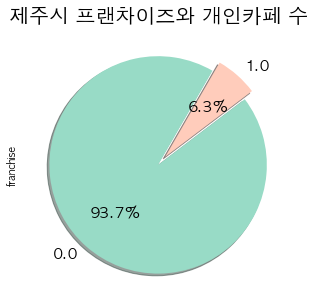

In [339]:
cafe_jeju['franchise'].value_counts().plot.pie(colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('제주시 프랜차이즈와 개인카페 수', fontsize=20)
# pylab.ylabel('')

# 애월읍_프랜차이즈 확인해보기

In [340]:
cafe_aw.groupby(['ri','franchise']).count()

final_address  addrbunho  address  cafe  cafe_id  image_url  \
ri   franchise                                                                
고내리  0.0                   18         18       18    18       18         13   
     1.0                    3          3        3     3        3          2   
고성리  0.0                    6          6        6     6        6          2   
곽지리  0.0                   15         15       15    15       15         12   
     1.0                    1          1        1     1        1          1   
광령리  0.0                   13         13       13    13       13          7   
     1.0                    1          1        1     1        1          0   
구엄리  0.0                   11         11       11    11       11          7   
금성리  0.0                    5          5        5     5        5          1   
납읍리  0.0                    9          9        9     9        9          7   
봉성리  0.0                    5          5        5     5        5          3   
상가리  0.0                    3          3        3     3        3          3   
상귀리  0.0                    2          2        2     2        2          1   
소길리  0.0                    7          7        7     7        7          4   
     1.0                    1          1        1     1        1          0   
수산리  0.0                    5          5        5     5        5          5   
신엄리  0.0                   21         21       21    21       21         11   
     1.0                    1          1        1     1        1          1   
애월리  0.0                   24         24       25    25       25         19   
     1.0                    1          1        1     1        1          1   
어음리  0.0                    2          2        2     2        2          1   
유수암리 0.0                   19         19       19    19       19          8   
     1.0                    1          1        1     1        1          1   
장전리  0.0                    4          4        4     4        4          4   
하가리  0.0                   10         10       10    10       10          7   
하귀1리 0.0                   25         25       25    25       25         12   
     1.0                    1          1        1     1        1          1   
하귀2리 0.0                   17         17       17    17       17         10   

                si  town  address1  
ri   franchise                      
고내리  0.0        18    18        18  
     1.0         3     3         3  
고성리  0.0         6     6         6  
곽지리  0.0        15    15        15  
     1.0         1     1         1  
광령리  0.0        13    13        13  
     1.0         1     1         1  
구엄리  0.0        11    11        11  
금성리  0.0         5     5         5  
납읍리  0.0         9     9         9  
봉성리  0.0         5     5         5  
상가리  0.0         3     3         3  
상귀리  0.0         2     2         2  
소길리  0.0         7     7         7  
     1.0         1     1         1  
수산리  0.0         5     5         5  
신엄리  0.0        21    21        21  
     1.0         1     1         1  
애월리  0.0        25    25        25  
     1.0         1     1         1  
어음리  0.0         2     2         2  
유수암리 0.0        19    19        19  
     1.0         1     1         1  
장전리  0.0         4     4         4  
하가리  0.0        10    10        10  
하귀1리 0.0        25    25        25  
     1.0         1     1         1  
하귀2리 0.0        17    17        17

Text(0.5, 1.0, '애월읍 프랜차이즈와 개인카페 수')

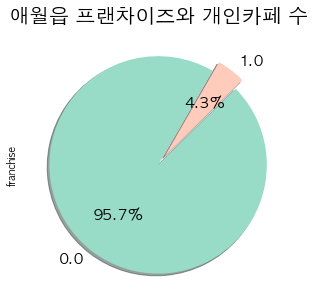

In [342]:
cafe_aw['franchise'].value_counts().plot.pie(colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('애월읍 프랜차이즈와 개인카페 수', fontsize=20)
# pylab.ylabel('')

# 자연어처리

In [369]:
cc_jeju.sample(10)

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,dong,address1,date,likeCnt,message,point,user_id
1452,제주특별자치도 제주시 노형동 103-5,103-5,제주특별자치도 제주시 노형동,커피99.9,26392726,http://t1.daumcdn.net/place/F1B848B2321745C184...,0.0,제주시,제주시,제주시,노형동,"[제주특별자치도, 제주시, 노형동]",2018.02.28.,2.0,리뷰가 많아서 가봤는데... 아담하고 평범합니다. \n조용해서 좋긴하고.. \n수...,3.0,77649.0
580,제주특별자치도 제주시 노형동 2615-10,2615-10,제주특별자치도 제주시 노형동,죽이야기 카페제주점,12135268,NaN,0.0,제주시,제주시,제주시,노형동,"[제주특별자치도, 제주시, 노형동]",2012.09.12.,NaN,"죽도 있구요 아기들을 위한 이유식 웰빙 비빔밥......그리고 향긋한 커피,음료...",5.0,559001.0
1388,제주특별자치도 제주시 노형동 3786-1,3786-1,제주특별자치도 제주시 노형동,프롬더럭 노형점,175437176,http://t1.daumcdn.net/place/5AB290400D8F401ABE...,0.0,제주시,제주시,제주시,노형동,"[제주특별자치도, 제주시, 노형동]",2016.06.10.,NaN,"정말 분위가 끝내주는 카페네요.. 커피는 일리원두를 사용하고, 두가지 원두중에 하나...",5.0,1571730.0
1006,제주특별자치도 제주시 내도동 640-1,640-1,제주특별자치도 제주시 내도동,카페더문,730657517,http://t1.daumcdn.net/place/AFBFB3FC1A764B279C...,0.0,제주시,제주시,제주시,내도동,"[제주특별자치도, 제주시, 내도동]",2016.12.02.,NaN,분위기 너무 좋고 커피 맛도 넘 좋았어요^^ 추천!!,5.0,1032820.0
86,제주특별자치도 제주시 이도2동 1772-17,1772-17,제주특별자치도 제주시 이도2동,빠빠라기 시청점,11053803,http://t1.daumcdn.net/place/672C6E28ED514094B1...,0.0,제주시,제주시,제주시,이도2동,"[제주특별자치도, 제주시, 이도2동]",2018.01.04.,0.0,빠빠라기 빙수 포장해서\n집에서 가족들이랑 먹으면\n빙순데도 배부를정도!,5.0,48320.0
1373,제주특별자치도 제주시 노형동 3786-1,3786-1,제주특별자치도 제주시 노형동,프롬더럭 노형점,175437176,http://t1.daumcdn.net/place/5AB290400D8F401ABE...,0.0,제주시,제주시,제주시,노형동,"[제주특별자치도, 제주시, 노형동]",2017.10.19.,0.0,가격은 더럽게 비싼데 맛이없어요. 밍밍함 티라미수 라떼\n가루만 더럽게 날리고 물맛남;,2.0,16874.0
2132,제주특별자치도 제주시 연동 272-1,272-1,제주특별자치도 제주시 연동,이디야커피 제주연동점,8047772,http://t1.daumcdn.net/place/68A94611D6D2495CBE...,1.0,제주시,제주시,제주시,연동,"[제주특별자치도, 제주시, 연동]",2010.03.09.,NaN,위치가 별로 안좋은듯...자주 안가게 되네요 괜찮은데;,3.0,112112.0
3913,제주특별자치도 제주시 연동 272-34,272-34,제주특별자치도 제주시 연동,로얄호텔 구내카페,21500283,NaN,0.0,제주시,제주시,제주시,연동,"[제주특별자치도, 제주시, 연동]",NaN,NaN,NaN,NaN,NaN
1946,제주특별자치도 제주시 연동 1523,1523,제주특별자치도 제주시 연동,아라파파,19606781,http://t1.daumcdn.net/place/2358731FD78B4984BF...,0.0,제주시,제주시,제주시,연동,"[제주특별자치도, 제주시, 연동]",2018.03.29.,NaN,NaN,5.0,1020522.0
3081,제주특별자치도 제주시 건입동 1441,1441,제주특별자치도 제주시 건입동,앙뚜아네트,309701322,http://t1.daumcdn.net/place/2BAB231D9718449080...,0.0,제주시,제주시,제주시,건입동,"[제주특별자치도, 제주시, 건입동]",2019.06.23.,0.0,전반적으로 가격이 너무 세다.(맛에 비해)\n그래도 빵은 괜찮았는데 케이크는 기대 ...,2.0,833406.0


In [425]:
message_jeju =cc_jeju.copy()

In [426]:
message_jeju.sample(5)

,final_address,addrbunho,address,cafe,cafe_id,image_url,franchise,si,town,ri,dong,address1,date,likeCnt,message,point,user_id,NaN,message_jeju
1925,제주특별자치도 제주시 연동 1523,1523,제주특별자치도 제주시 연동,아라파파,19606781,http://t1.daumcdn.net/place/2358731FD78B4984BF...,0.0,제주시,제주시,제주시,연동,"[제주특별자치도, 제주시, 연동]",2018.01.26.,0.0,NaN,4.0,692791.0,None,None
3466,제주특별자치도 제주시 연동 272-43,272-43,제주특별자치도 제주시 연동,요거프레소 바오젠점,27384817,NaN,0.0,제주시,제주시,제주시,연동,"[제주특별자치도, 제주시, 연동]",2019.01.28.,0.0,NaN,4.0,380917.0,None,None
726,제주특별자치도 제주시 삼양이동 1965-3,1965-3,제주특별자치도 제주시 삼양이동,이솔라,1995771772,http://t1.daumcdn.net/localfiy/searchregister_...,0.0,제주시,제주시,제주시,삼양이동,"[제주특별자치도, 제주시, 삼양이동]",2019.04.24.,0.0,음식도 맛있고 사장님도 너무 친절해서 좋아용~~ \n분위기는 덤입니다 ~ 바다 보...,5.0,516239.0,None,None
2864,제주특별자치도 제주시 봉개동 237-13,237-13,제주특별자치도 제주시 봉개동,라헨느골프텔,24122982,NaN,0.0,제주시,제주시,제주시,봉개동,"[제주특별자치도, 제주시, 봉개동]",NaN,NaN,NaN,NaN,NaN,None,None
96,제주특별자치도 제주시 이도2동 1772-17,1772-17,제주특별자치도 제주시 이도2동,빠빠라기 시청점,11053803,http://t1.daumcdn.net/place/672C6E28ED514094B1...,0.0,제주시,제주시,제주시,이도2동,"[제주특별자치도, 제주시, 이도2동]",2013.09.07.,NaN,제주 유명 빙수 가게 빠빠라기! 15년 넘게 장사하네\n하나 시켜서 4명이 충분히 ...,0.0,109718.0,None,None


In [427]:
message_jeju['message'].isnull().sum()

1417

In [441]:
message_=message_jeju[message_jeju['message'].notnull()]

In [443]:
message_.columns

Index(['final_address',     'addrbunho',       'address',          'cafe',
             'cafe_id',     'image_url',     'franchise',            'si',
                'town',            'ri',          'dong',      'address1',
                'date',       'likeCnt',       'message',         'point',
             'user_id',            None,  'message_jeju',      'message1'],
      dtype='object')

In [447]:
need = [ 'cafe',  'message', 'point']
real=message_[need]

In [449]:
real

,cafe,message,point
7,런던아이,런던아이는 유럽 특히 영국의 정통 엠티가구가 진열된 크레식한 추억의 카페에서 향긋한...,5.0
11,미닝풀모먼츠,아담하고 사람도 많지 않고 분위기도 좋아요! 벽돌 느낌의 따뜻한 카페! 디저트도 맛...,5.0
12,미닝풀모먼츠,쑥케이크 맛있아요,5.0
13,미닝풀모먼츠,사장님도 친절하시고 가게 분위기도 이뻐요~!\n매일 손수 만든 디저트 판매하는데 신...,5.0
16,온도커피,로스팅커피가 맛있어요. 들어본적은 없어 기대안하구갔는데 완전 기대이상. 자주들를꺼같...,4.0
17,바라나시책골목,제주 속의 신비한 인도,5.0
18,바라나시책골목,인도가 그리웠는데 인도 느낌이 나서 정말 반가웠어요. 다양한 책들이 너무 많아서 뭘...,5.0
19,사닮과,케이크 정말 ㅠㅠㅠ 정말 맛있는 곳이에요!! \n친절하신 사장님 부부와 매일 직접 ...,5.0
20,사닮과,사닮과가 제주도에 있어 다행이라는 생각을 매번 합니다. 별 다섯 개가 모자라요 ( ...,5.0
21,사닮과,맛있어요...,5.0


In [450]:
real['point1'] = real['point'].apply(lambda x: 1 if x >= 3 else 0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
